### Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_excel('dataset.xlsx')
data = df

In [3]:
# data = pd.DataFrame.from_dict({key: value.values.flatten() for key, value in df.items()}, orient='index')
# data = pd.concat(df.values(), keys=df.keys())

In [4]:
print(data.shape)
data.head()

(330258, 36)


,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,Total_Fuel_Quantity,Fuel_Imbalance,Average_Cylinder_Head_Temp,Exhaust_Gas_Temp_Spread,Oil_Pressure_to_Temp_Ratio,Normalized_Air_Speed,Engine_Efficiency,Thermal_Efficiency,Temp_Stress,Temp_Imbalance
0,28.000000,28.000000,9.600000,0.700000,20.82,20.360000,2.290000,153.490000,56.580000,1058.300000,...,41.180000,0.460000,189.080000,74.380000,0.368623,0.0,0.002164,4.948950,5142.97600,17.760000
1,28.100000,28.100000,4.300000,0.400000,19.09,21.080000,2.290000,74.510000,65.880000,1250.100000,...,40.170000,1.990000,104.602500,110.550000,0.884177,0.0,0.001832,11.506991,2876.56875,9.690000
2,27.973715,28.000403,0.721532,-0.019562,54.00,21.362993,6.507629,147.984106,63.384939,1865.485103,...,75.362993,32.637007,302.200441,16.541537,0.428323,0.0,0.003488,4.147468,5983.56873,19.543408
3,28.000000,28.000000,6.300000,0.300000,19.44,20.490000,2.410000,67.020000,68.350000,1182.200000,...,39.930000,1.050000,70.962500,136.830000,1.019845,0.0,0.002039,14.570090,-298.04250,5.600000
4,28.100000,28.100000,5.000000,0.400000,24.00,21.350000,2.870000,121.200000,60.590000,1239.200000,...,45.350000,2.650000,122.642500,24.590000,0.499917,0.0,0.002316,8.609821,1986.80850,10.900000


In [5]:
'''
# Plot histogram of 'OAT' distribution by 'target' (0 and 1)
plt.figure(figsize=(10, 6))
for target_value in [0, 1]:
    subset = data[data['target'] == target_value]
    plt.hist(subset['OAT'], bins=30, alpha=0.5, label=f"Target {target_value}")

plt.title("Distribution of OAT by Target")
plt.xlabel("OAT")
plt.ylabel("Frequency")
plt.legend()
plt.show()
'''

'\n# Plot histogram of \'OAT\' distribution by \'target\' (0 and 1)\nplt.figure(figsize=(10, 6))\nfor target_value in [0, 1]:\n    subset = data[data[\'target\'] == target_value]\n    plt.hist(subset[\'OAT\'], bins=30, alpha=0.5, label=f"Target {target_value}")\n\nplt.title("Distribution of OAT by Target")\nplt.xlabel("OAT")\nplt.ylabel("Frequency")\nplt.legend()\nplt.show()\n'

In [6]:
'''
# Data distribution
target_counts = data['target'].value_counts()

print("Target Distribution:")
print(target_counts)

print("\nTarget Proportion:")
print(target_counts / len(data))
'''

'\n# Data distribution\ntarget_counts = data[\'target\'].value_counts()\n\nprint("Target Distribution:")\nprint(target_counts)\n\nprint("\nTarget Proportion:")\nprint(target_counts / len(data))\n'

In [7]:
feature_data = data[['E1 CHT2','E1 EGT2','volt1','amp1','amp2','OAT','E1 OilP','E1 OilT','FQtyL','FQtyR','Temp_Imbalance','Normalized_Air_Speed','Exhaust_Gas_Temp_Spread','Thermal_Efficiency','Voltage_Difference','E1 FFlow','target']]
feature_data = feature_data.rename(columns={'E1 CHT2':'E1_CHT2','E1 EGT2':'E1_EGT2','E1 OilP':'E1_OilP','E1 OilT':'E1_OilT','E1 FFlow':'E1_FFlow'})

In [8]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(feature_data, test_size = .3, random_state = 2024)
df_train.shape, df_test.shape

((231180, 17), (99078, 17))

### 1. Logistic Regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf

In [10]:
X_train = df_train.drop(columns = ['target'], axis = 1)
y_train = df_train['target']
X_test = df_test.drop(columns = ['target'], axis = 1)
y_test = df_test['target']

In [11]:
model_logit_1 = smf.logit('target ~ E1_CHT2 + E1_EGT2 + volt1 + amp1 + amp2 + OAT + E1_OilP + E1_OilT + FQtyL + FQtyR + Temp_Imbalance + Normalized_Air_Speed + Exhaust_Gas_Temp_Spread + Thermal_Efficiency + Voltage_Difference + E1_FFlow', df_train).fit()
print(model_logit_1.summary())

Optimization terminated successfully.
         Current function value: 0.626446
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               231180
Model:                          Logit   Df Residuals:                   231163
Method:                           MLE   Df Model:                           16
Date:                Tue, 17 Dec 2024   Pseudo R-squ.:                 0.08569
Time:                        16:19:24   Log-Likelihood:            -1.4482e+05
converged:                       True   LL-Null:                   -1.5839e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   8.5650      0.363     23.584      0.000       7.853   

In [12]:
# Remove E1_OilP

model_logit_2 = smf.logit('target ~ E1_CHT2 + E1_EGT2 + volt1 + amp1 + amp2 + OAT + E1_OilT + FQtyL + FQtyR + Temp_Imbalance + Normalized_Air_Speed + Exhaust_Gas_Temp_Spread + Thermal_Efficiency + Voltage_Difference + E1_FFlow', df_train).fit()
print(model_logit_2.summary())

Optimization terminated successfully.
         Current function value: 0.626453
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               231180
Model:                          Logit   Df Residuals:                   231164
Method:                           MLE   Df Model:                           15
Date:                Tue, 17 Dec 2024   Pseudo R-squ.:                 0.08568
Time:                        16:19:25   Log-Likelihood:            -1.4482e+05
converged:                       True   LL-Null:                   -1.5839e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   8.4516      0.357     23.660      0.000       7.752   

In [13]:
# Remove amp1

model_logit_3 = smf.logit('target ~ E1_CHT2 + E1_EGT2 + volt1 + amp2 + OAT + E1_OilT + FQtyL + FQtyR + Temp_Imbalance + Normalized_Air_Speed + Exhaust_Gas_Temp_Spread + Thermal_Efficiency + Voltage_Difference + E1_FFlow', df_train).fit()
print(model_logit_3.summary())

Optimization terminated successfully.
         Current function value: 0.626453
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               231180
Model:                          Logit   Df Residuals:                   231165
Method:                           MLE   Df Model:                           14
Date:                Tue, 17 Dec 2024   Pseudo R-squ.:                 0.08568
Time:                        16:19:26   Log-Likelihood:            -1.4482e+05
converged:                       True   LL-Null:                   -1.5839e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   8.5086      0.295     28.805      0.000       7.930   

In [14]:
def accuracy(cm):
    return ((cm.ravel()[0] + cm.ravel()[3]) / sum(cm.ravel()))
def TPR(cm):
    return ((cm.ravel()[3]) / (cm.ravel()[2] + cm.ravel()[3]))
def FPR(cm):
    return ((cm.ravel()[1]) / (cm.ravel()[0] + cm.ravel()[1]))
def PRE(cm):
    return ((cm.ravel()[3]) / (cm.ravel()[3] + cm.ravel()[1]))

#### Metrics (train set)

In [15]:
p = 0.5 # Default for comparing base models

y_prob_logit_train = model_logit_3.predict(df_train)
y_pred_logit_train = pd.Series([1 if x > p else 0 for x in y_prob_logit_train], index=y_prob_logit_train.index)

cm_logit_train = confusion_matrix(y_train, y_pred_logit_train)

train_acc = accuracy(cm_logit_train)
train_TPR = TPR(cm_logit_train)
train_FPR = FPR(cm_logit_train)
train_PRE = PRE(cm_logit_train)

print("Confusion Matrix (Train Set): \n", cm_logit_train)
print(f'Accuracy (Train Set): {train_acc:.4f}')
print(f'True Positive Rate (Train Set): {train_TPR:.4f}')
print(f'False Positive Rate (Train Set): {train_FPR:.4f}')
print(f'Precision (Train Set): {train_PRE:.4f}')

Confusion Matrix (Train Set): 
 [[102374  27808]
 [ 54366  46632]]
Accuracy (Train Set): 0.6445
True Positive Rate (Train Set): 0.4617
False Positive Rate (Train Set): 0.2136
Precision (Train Set): 0.6264


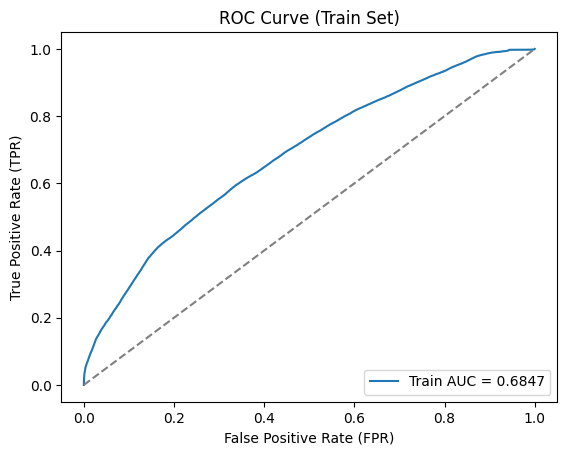

AUC-ROC Score (Train Set): 0.6847


In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_logit_train = model_logit_3.predict(df_train)
y_true_train = y_train

fpr_train, tpr_train, thresholds_train = roc_curve(y_true_train, y_prob_logit_train)

auc_score_train = roc_auc_score(y_true_train, y_prob_logit_train)

plt.figure()
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_score_train:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve (Train Set)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC Score (Train Set): {auc_score_train:.4f}")

#### Metrics (test set)

In [17]:
y_prob_logit = model_logit_3.predict(df_test)
y_pred_logit = pd.Series([1 if x > p else 0 for x in y_prob_logit], index = y_prob_logit.index)

cm_logit = confusion_matrix(y_test, y_pred_logit)
log_acc = accuracy(cm_logit)
log_TPR = TPR(cm_logit)
log_FPR = FPR(cm_logit)
log_PRE = PRE(cm_logit)
print ("Confusion Matrix: \n", cm_logit)
print (f'Accuracy: {log_acc:.4f}')
print (f'True Positive Rate: {log_TPR:.4f}')
print (f'False Positive Rate: {log_FPR:.4f}')
print (f'Precision: {log_PRE:.4f}')

Confusion Matrix: 
 [[43998 11871]
 [23217 19992]]
Accuracy: 0.6459
True Positive Rate: 0.4627
False Positive Rate: 0.2125
Precision: 0.6274


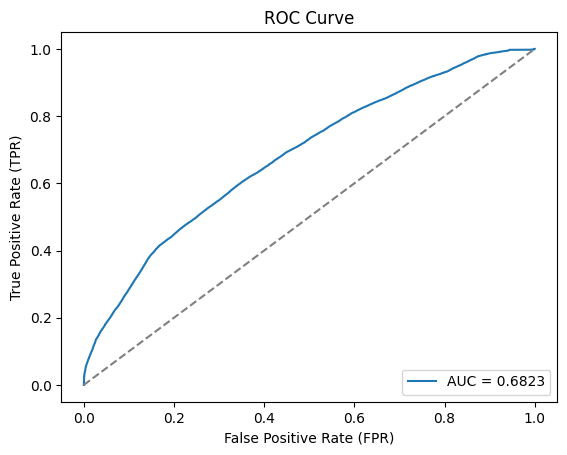

AUC-ROC Score: 0.6823


In [18]:
y_prob = model_logit_3.predict(df_test)
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_prob)

auc_score = roc_auc_score(y_true, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC Score: {auc_score:.4f}")

### 2. LDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [20]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

#### Metrics (train set)

In [21]:
lda_pred_train = lda_model.predict(X_train)

cm_lda_train = confusion_matrix(y_train, lda_pred_train)

lda_acc_train = accuracy(cm_lda_train)
lda_TPR_train = TPR(cm_lda_train)
lda_FPR_train = FPR(cm_lda_train)
lda_PRE_train = PRE(cm_lda_train)

print("Confusion Matrix (Train Set): \n", cm_lda_train)
print(f'Accuracy (Train Set): {lda_acc_train:.4f}')
print(f'True Positive Rate (Train Set): {lda_TPR_train:.4f}')
print(f'False Positive Rate (Train Set): {lda_FPR_train:.4f}')
print(f'Precision (Train Set): {lda_PRE_train:.4f}')

Confusion Matrix (Train Set): 
 [[103299  26883]
 [ 55466  45532]]
Accuracy (Train Set): 0.6438
True Positive Rate (Train Set): 0.4508
False Positive Rate (Train Set): 0.2065
Precision (Train Set): 0.6288


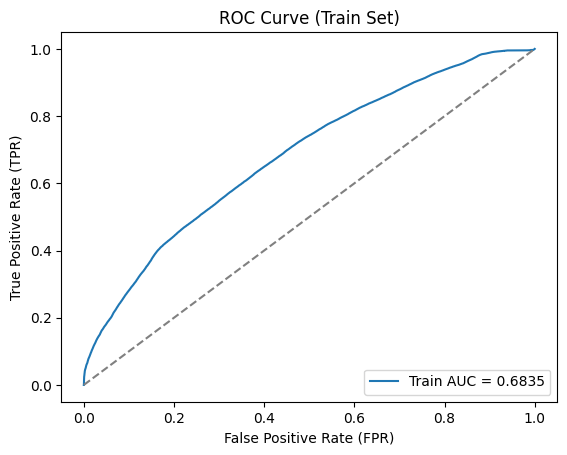

AUC-ROC Score (Train Set): 0.6835


In [22]:
y_prob_lda_train = lda_model.predict_proba(X_train)[:, 1]
y_true_train = y_train

fpr_train, tpr_train, thresholds_train = roc_curve(y_true_train, y_prob_lda_train)

auc_score_train = roc_auc_score(y_true_train, y_prob_lda_train)

plt.figure()
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_score_train:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve (Train Set)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC Score (Train Set): {auc_score_train:.4f}")

#### Metrics (test set)

In [23]:
lda_pred = lda_model.predict(X_test)

cm_lda = confusion_matrix(y_test, lda_pred)
lda_acc = accuracy(cm_lda)
lda_TPR = TPR(cm_lda)
lda_FPR = FPR(cm_lda)
lda_PRE = PRE(cm_lda)
print ("Confusion Matrix: \n", cm_lda)
print (f'Accuracy: {lda_acc:.4f}')
print (f'True Positive Rate: {lda_TPR:.4f}')
print (f'False Positive Rate: {lda_FPR:.4f}')
print (f'Precision: {lda_PRE:.4f}')

Confusion Matrix: 
 [[44284 11585]
 [23665 19544]]
Accuracy: 0.6442
True Positive Rate: 0.4523
False Positive Rate: 0.2074
Precision: 0.6278


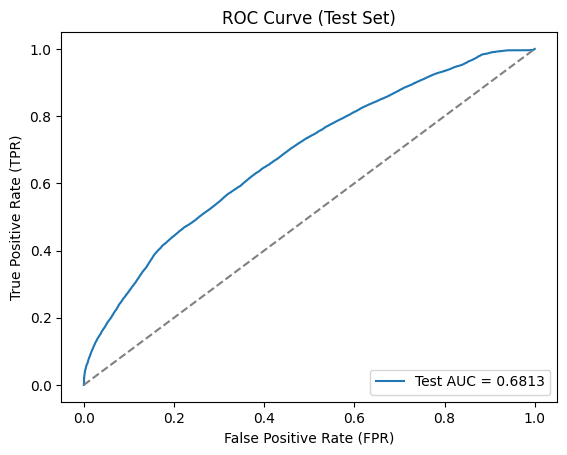

AUC-ROC Score (Test Set): 0.6813


In [24]:
# Use prob. to calculate ROC-AUC
y_prob_lda_test = lda_model.predict_proba(X_test)[:, 1]
y_true_test = y_test

fpr_test, tpr_test, thresholds_test = roc_curve(y_true_test, y_prob_lda_test)
auc_score_test = roc_auc_score(y_true_test, y_prob_lda_test)

plt.figure()
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_score_test:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve (Test Set)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC Score (Test Set): {auc_score_test:.4f}")

### 3. CART

In [25]:
from sklearn.tree import plot_tree
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
grid_values = {
    'ccp_alpha': np.linspace(0, 0.005, 6),
    'min_samples_leaf': [10, 15],
    'min_samples_split': [100, 150],
    'max_depth': [10, 15],
    'random_state': [2024]
}

auc_roc_scorer = make_scorer(roc_auc_score, needs_proba=True)

dtr = DecisionTreeClassifier()

dtc_cv_auc = GridSearchCV(dtr, param_grid=grid_values, scoring=auc_roc_scorer, cv=5, verbose=2, n_jobs=-1)
dtc_cv_auc.fit(X_train, y_train)

model_dtr_auc = dtc_cv_auc.best_score_
model_dtr_best_ccp_alpha_auc = dtc_cv_auc.best_params_['ccp_alpha']

print(f'CV CART Test AUC ROC: {model_dtr_auc:.4f}')
print(f'Best ccp_alpha: {model_dtr_best_ccp_alpha_auc:.4f}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [27]:
'''
# Get the best estimator from GridSearchCV
best_tree = dtc_cv_auc.best_estimator_

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_tree,
    feature_names=X_train.columns,  # Use appropriate feature names
    class_names=['Class 0', 'Class 1'],  # Replace with your class labels
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Optimal Decision Tree Visualization")
plt.show()
'''

'\n# Get the best estimator from GridSearchCV\nbest_tree = dtc_cv_auc.best_estimator_\n\n# Plot the decision tree\nplt.figure(figsize=(20, 10))\nplot_tree(\n    best_tree,\n    feature_names=X_train.columns,  # Use appropriate feature names\n    class_names=[\'Class 0\', \'Class 1\'],  # Replace with your class labels\n    filled=True,\n    rounded=True,\n    fontsize=10\n)\nplt.title("Optimal Decision Tree Visualization")\nplt.show()\n'

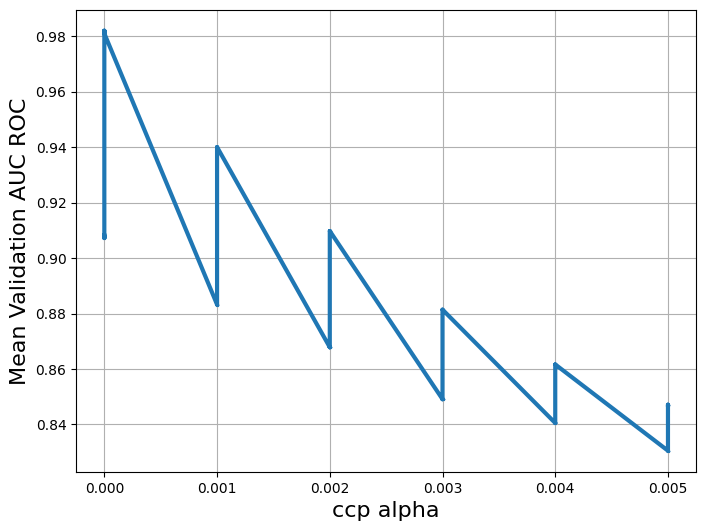

In [28]:
auc = dtc_cv_auc.cv_results_['mean_test_score']
ccp = dtc_cv_auc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha': ccp, 'Mean Validation AUC ROC': auc}).head(20)

plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('Mean Validation AUC ROC', fontsize=16)
plt.scatter(ccp, auc, s=2)
plt.plot(ccp, auc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [29]:
print('Grid best parameter ccp_alpha (max. AUC ROC): ', dtc_cv_auc.best_params_['ccp_alpha'])
print('Grid best score (AUC ROC): ', dtc_cv_auc.best_score_)

Grid best parameter ccp_alpha (max. AUC ROC):  0.0
Grid best score (AUC ROC):  0.9819892283263567


#### Metrics (train)

In [30]:
dtc_train_pred = dtc_cv_auc.predict(X_train)
cm_dtc_train = confusion_matrix(y_train, dtc_train_pred)

dtc_train_acc = accuracy(cm_dtc_train)
dtc_train_TPR = TPR(cm_dtc_train)
dtc_train_FPR = FPR(cm_dtc_train)
dtc_train_PRE = PRE(cm_dtc_train)

print("Confusion Matrix (Train): \n", cm_dtc_train)
print(f'Accuracy (Train): {dtc_train_acc:.4f}')
print(f'True Positive Rate (Train): {dtc_train_TPR:.4f}')
print(f'False Positive Rate (Train): {dtc_train_FPR:.4f}')
print(f'Precision (Train): {dtc_train_PRE:.4f}')

Confusion Matrix (Train): 
 [[124122   6060]
 [  8067  92931]]
Accuracy (Train): 0.9389
True Positive Rate (Train): 0.9201
False Positive Rate (Train): 0.0466
Precision (Train): 0.9388


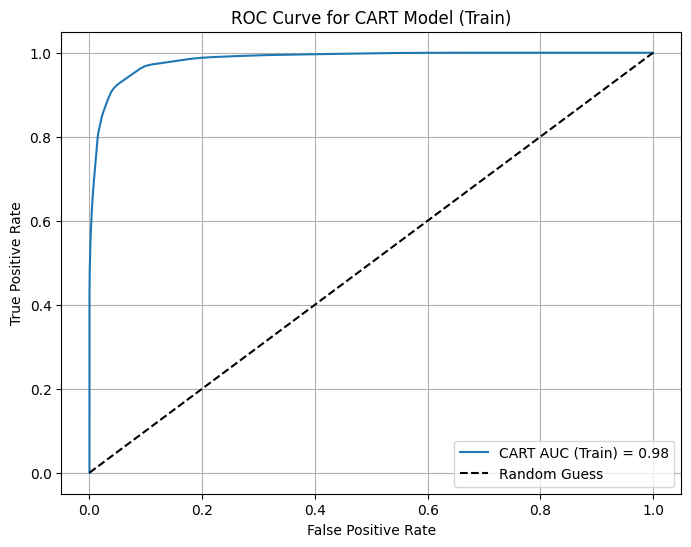

AUC-ROC Score (Train Set): 0.9846


In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_cart_train = dtc_cv_auc.best_estimator_.predict_proba(X_train)[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_cart_train)

auc_cart_train = roc_auc_score(y_train, y_prob_cart_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"CART AUC (Train) = {auc_cart_train:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CART Model (Train)")
plt.legend()
plt.grid()
plt.show()

print(f"AUC-ROC Score (Train Set): {auc_cart_train:.4f}")

#### Metrics (test)

In [32]:
dtc_pred = dtc_cv_auc.predict(X_test)

cm_dtc = confusion_matrix(y_test, dtc_pred)
dtc_acc = accuracy(cm_dtc)
dtc_TPR = TPR(cm_dtc)
dtc_FPR = FPR(cm_dtc)
dtc_PRE = PRE(cm_dtc)
print ("Confusion Matrix: \n", cm_dtc)
print (f'Accuracy: {dtc_acc:.4f}')
print (f'True Positive Rate: {dtc_TPR:.4f}')
print (f'False Positive Rate: {dtc_FPR:.4f}')
print (f'Precision: {dtc_PRE:.4f}')

Confusion Matrix: 
 [[53210  2659]
 [ 3550 39659]]
Accuracy: 0.9373
True Positive Rate: 0.9178
False Positive Rate: 0.0476
Precision: 0.9372


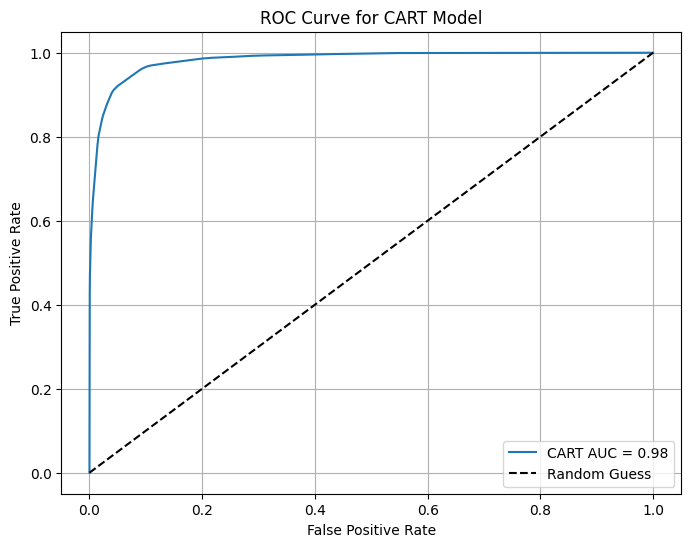

AUC-ROC Score: 0.9833


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_cart = dtc_cv_auc.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_cart)

auc_cart = roc_auc_score(y_test, y_prob_cart)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"CART AUC = {auc_cart:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CART Model")
plt.legend()
plt.grid()
plt.show()

print(f"AUC-ROC Score: {auc_cart:.4f}")

### 4. Random Forest

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score

In [35]:
# Initialize and train Random Forest model
model_rf_1 = RandomForestRegressor(n_estimators=50, random_state=2024)
model_rf_1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=2024)

In [36]:
y_pred = model_rf_1.predict(X_test)

In [37]:
def print_rf_summary(model, X_test, y_test, y_pred):
    print("Random Forest Model Summary")
    print("=" * 40)

    print(f"Number of Trees (n_estimators): {model.n_estimators}")
    print(f"Max Depth: {model_rf_1.max_depth}")
    print(f"Random State: {model.random_state}")

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print("\nModel Performance Metrics:")
    print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

In [38]:
print_rf_summary(model_rf_1, X_test, y_test, y_pred)

# Feature importances
print("\nTop 10 Feature Importances:")
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': model_rf_1.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(10).to_string(index=False))
print("=" * 40)

Random Forest Model Summary
Number of Trees (n_estimators): 50
Max Depth: None
Random State: 2024

Model Performance Metrics:
RMSE (Root Mean Squared Error): 0.0380
R² Score: 0.9941

Top 10 Feature Importances:
             Feature  Importance
                 OAT    0.265980
             E1_OilT    0.113582
               FQtyL    0.085811
               FQtyR    0.083362
            E1_FFlow    0.061473
                amp1    0.058819
      Temp_Imbalance    0.056583
             E1_OilP    0.055930
               volt1    0.048470
Normalized_Air_Speed    0.047302


/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
model_random_search = RandomForestClassifier(random_state=2024)

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 15],  # Max depth of the tree
    'min_samples_split': [100, 150],  # Min samples to split an internal node
    'min_samples_leaf': [10, 15],    # Min samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True]  # Whether to use bootstrap samples or not
}

In [40]:
auc_roc_scorer = make_scorer(roc_auc_score, needs_proba=True)

random_search = RandomizedSearchCV(
    estimator=model_random_search,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring=auc_roc_scorer
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score (AUC ROC):", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=150, n_estimators=50; total time=  47.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=150, n_estimators=50; total time=  47.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=150, n_estimators=50; total time=  48.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=150, n_estimators=50; total time=  48.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=150, n_estimators=50; total time=  48.2s
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time= 4.3min
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time= 4.3min
[CV] END bootstrap=True, max_dep

#### Metrics (train)

In [41]:
model_rf_2 = random_search.best_estimator_
y_train_pred = model_rf_2.predict(X_train)

# Calculate RMSE and R²
from sklearn.metrics import mean_squared_error, r2_score
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R² Score: {r2_train}")

Train RMSE: 0.10184728580281421
Train R² Score: 0.9578365902485936


/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
ran_prob_train = model_rf_2.predict(X_train)

cm_ran_train = confusion_matrix(y_train, ran_prob_train)
ran_acc_train = accuracy(cm_ran_train)
ran_TPR_train = TPR(cm_ran_train)
ran_FPR_train = FPR(cm_ran_train)
ran_PRE_train = PRE(cm_ran_train)

print("Confusion Matrix (Train): \n", cm_ran_train)
print(f'Accuracy (Train): {ran_acc_train:.4f}')
print(f'True Positive Rate (Train): {ran_TPR_train:.4f}')
print(f'False Positive Rate (Train): {ran_FPR_train:.4f}')
print(f'Precision (Train): {ran_PRE_train:.4f}')

Confusion Matrix (Train): 
 [[129825    357]
 [  2041  98957]]
Accuracy (Train): 0.9896
True Positive Rate (Train): 0.9798
False Positive Rate (Train): 0.0027
Precision (Train): 0.9964


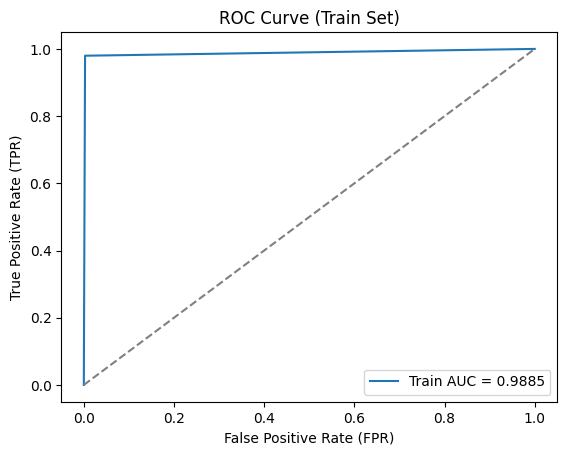

AUC-ROC Score (Train Set): 0.9885


In [43]:
auc_score_train = roc_auc_score(y_train, ran_prob_train)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ran_prob_train)

plt.figure()
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_score_train:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve (Train Set)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC Score (Train Set): {auc_score_train:.4f}")

#### Metrics (test)

In [44]:
model_rf_2 = random_search.best_estimator_
y_pred = model_rf_2.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 0.11146548520277268
R² Score: 0.9494768789846983


/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
ran_prob = model_rf_2.predict(X_test)
# ran_pred = [1 if x > 0.5 else 0 for x in ran_prob]

cm_ran = confusion_matrix(y_test, ran_prob)
ran_acc = accuracy(cm_ran)
ran_TPR = TPR(cm_ran)
ran_FPR = FPR(cm_ran)
ran_PRE = PRE(cm_ran)
print ("Confusion Matrix: \n", cm_ran)
print (f'Accuracy: {ran_acc:.4f}')
print (f'True Positive Rate: {ran_TPR:.4f}')
print (f'False Positive Rate: {ran_FPR:.4f}')
print (f'Precision: {ran_PRE:.4f}')

Confusion Matrix: 
 [[55666   203]
 [ 1028 42181]]
Accuracy: 0.9876
True Positive Rate: 0.9762
False Positive Rate: 0.0036
Precision: 0.9952


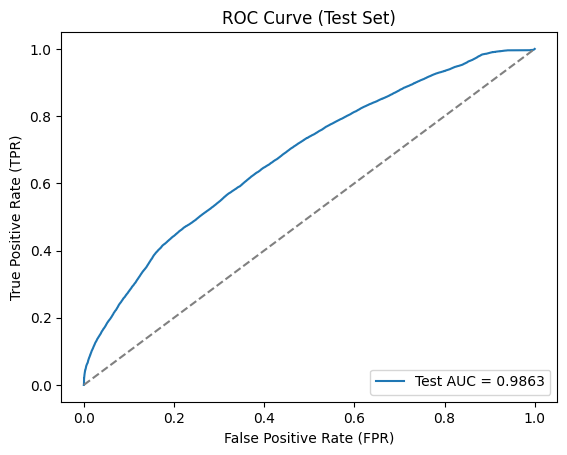

AUC-ROC Score (Test Set): 0.9863


In [46]:
auc_score_test = roc_auc_score(y_test, ran_prob)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_score_test:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve (Test Set)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC Score (Test Set): {auc_score_test:.4f}")

### 5. XG Boost

In [47]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
model_xgb_1 = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2024)
model_xgb_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=2024, ...)

In [49]:
y_pred_xgb = model_xgb_1.predict(X_test)

rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"RMSE (XGBoost): {rmse_xgb}")
print(f"R² Score (XGBoost): {r2_xgb}")

RMSE (XGBoost): 0.3813672320792505
R² Score (XGBoost): 0.408579875036152


/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
auc_roc_scorer = make_scorer(roc_auc_score, needs_proba=True)

param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 15],
    'min_child_weight': [5, 10],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 0.1],
}

xgb_random_search = RandomizedSearchCV(
    estimator=model_xgb_1,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring=auc_roc_scorer
)

xgb_random_search.fit(X_train, y_train)

print("Best Hyperparameters:", xgb_random_search.best_params_)
print("Best Cross-Validation AUC ROC:", xgb_random_search.best_score_)

model_xgb_2 = xgb_random_search.best_estimator_

y_prob_best_xgb = model_xgb_2.predict_proba(X_test)[:, 1]
y_pred_best_xgb = model_xgb_2.predict(X_test)  #

test_auc_roc = roc_auc_score(y_test, y_prob_best_xgb)
print(f"Test AUC ROC: {test_auc_roc:.4f}")

/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  13.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  13.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  13.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  13.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  13.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=10, n_estimators=200, subsample=0.9; total time=  14.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_d

#### Metrics (train)

In [51]:
model_xgb_2 = xgb_random_search.best_estimator_
y_pred_train_xgb = model_xgb_2.predict(X_train)

rmse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb, squared=False)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

print(f"RMSE (Train XGBoost): {rmse_train_xgb}")
print(f"R² Score (Train XGBoost): {r2_train_xgb}")

RMSE (Train XGBoost): 0.00509448743565307
R² Score (Train XGBoost): 0.9998945035619231


/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
xgb_prob_train = model_xgb_2.predict(X_train)
# ran_pred_train = [1 if x > 0.5 else 0 for x in xgb_prob_train]

cm_xgb_train = confusion_matrix(y_train, xgb_prob_train)
xgb_acc_train = accuracy(cm_xgb_train)
xgb_TPR_train = TPR(cm_xgb_train)
xgb_FPR_train = FPR(cm_xgb_train)
xgb_PRE_train = PRE(cm_xgb_train)

print("Confusion Matrix (Train): \n", cm_xgb_train)
print(f'Accuracy (Train): {xgb_acc_train:.4f}')
print(f'True Positive Rate (Train): {xgb_TPR_train:.4f}')
print(f'False Positive Rate (Train): {xgb_FPR_train:.4f}')
print(f'Precision (Train): {xgb_PRE_train:.4f}')

Confusion Matrix (Train): 
 [[130181      1]
 [     5 100993]]
Accuracy (Train): 1.0000
True Positive Rate (Train): 1.0000
False Positive Rate (Train): 0.0000
Precision (Train): 1.0000


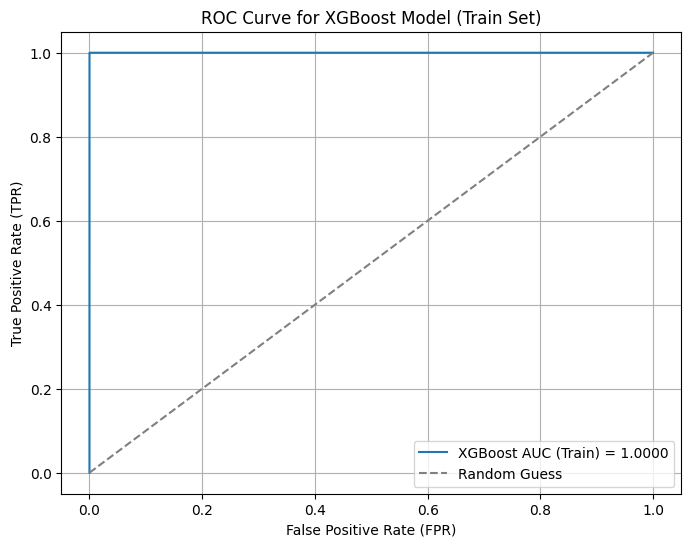

AUC-ROC Score (Train Set - XGBoost): 1.0000


In [53]:
xgb_prob_train = model_xgb_2.predict_proba(X_train)[:, 1]
fpr_xgb_train, tpr_xgb_train, thresholds_xgb_train = roc_curve(y_train, xgb_prob_train)

auc_xgb_train = roc_auc_score(y_train, xgb_prob_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_train, tpr_xgb_train, label=f"XGBoost AUC (Train) = {auc_xgb_train:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.title('ROC Curve for XGBoost Model (Train Set)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f"AUC-ROC Score (Train Set - XGBoost): {auc_xgb_train:.4f}")


#### Metrics (test)

In [54]:
model_xgb_2 = xgb_random_search.best_estimator_
y_pred_best_xgb = model_xgb_2.predict(X_test)

rmse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb, squared=False)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"RMSE (Best XGBoost): {rmse_best_xgb}")
print(f"R² Score (Best XGBoost): {r2_best_xgb}")

RMSE (Best XGBoost): 0.011454682620275696
R² Score (Best XGBoost): 0.9994664495749805


/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [55]:
xgb_prob = model_xgb_2.predict(X_test)
# ran_pred = [1 if x > 0.5 else 0 for x in ran_prob]

cm_xgb = confusion_matrix(y_test, xgb_prob)
xgb_acc = accuracy(cm_xgb)
xgb_TPR = TPR(cm_xgb)
xgb_FPR = FPR(cm_xgb)
xgb_PRE = PRE(cm_xgb)
print ("Confusion Matrix: \n", cm_xgb)
print (f'Accuracy: {xgb_acc:.4f}')
print (f'True Positive Rate: {xgb_TPR:.4f}')
print (f'False Positive Rate: {xgb_FPR:.4f}')
print (f'Precision: {xgb_PRE:.4f}')

Confusion Matrix: 
 [[55863     6]
 [    7 43202]]
Accuracy: 0.9999
True Positive Rate: 0.9998
False Positive Rate: 0.0001
Precision: 0.9999


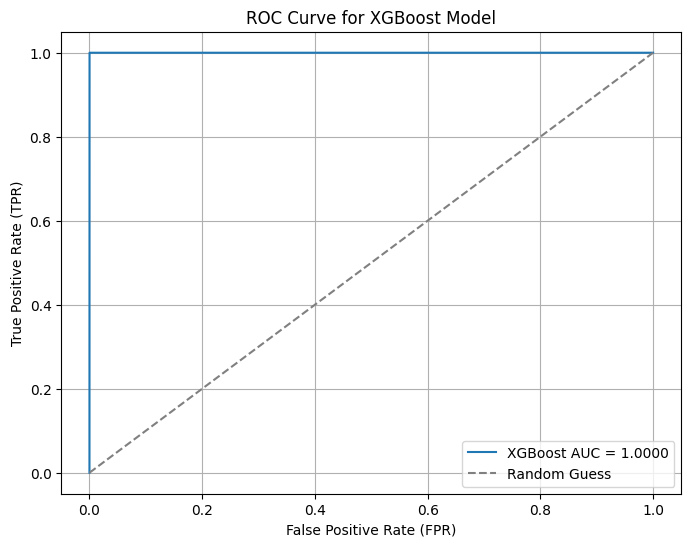

AUC-ROC Score (XGBoost): 1.0000


In [56]:
xgb_prob = model_xgb_2.predict_proba(X_test)[:, 1]

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_prob)

auc_xgb = roc_auc_score(y_test, xgb_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost AUC = {auc_xgb:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.title('ROC Curve for XGBoost Model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f"AUC-ROC Score (XGBoost): {auc_xgb:.4f}")

### 6. Light GBM

In [57]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

In [58]:
model_lgb_1 = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2024)
model_lgb_1.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 100998, number of negative: 130182
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3323
[LightGBM] [Info] Number of data points in the train set: 231180, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.436880 -> initscore=-0.253833
[LightGBM] [Info] Start training from score -0.253833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(max_depth=3, random_state=2024)

In [59]:
y_pred_lgb = model_lgb_1.predict(X_test)

rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"RMSE (LightGBM): {rmse_lgb}")
print(f"R² Score (LightGBM): {r2_lgb}")

RMSE (LightGBM): 0.3819886640065911
R² Score (LightGBM): 0.40665088503800484


/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
auc_roc_scorer = make_scorer(roc_auc_score, needs_proba=True)

param_dist_lgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 15],
    'num_leaves': [31, 50],
    'min_child_samples': [10, 15],
    'feature_fraction': [0.8, 0.9]
}

lgb_random_search = RandomizedSearchCV(
    estimator=model_lgb_1,
    param_distributions=param_dist_lgb,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring=auc_roc_scorer
)

lgb_random_search.fit(X_train, y_train)

print("Best Hyperparameters for LightGBM:", lgb_random_search.best_params_)
print("Best Cross-Validation AUC ROC:", lgb_random_search.best_score_)

model_lgb_2 = lgb_random_search.best_estimator_

y_prob_best_lgb = model_lgb_2.predict_proba(X_test)[:, 1]
y_pred_best_lgb = model_lgb_2.predict(X_test)

test_auc_roc = roc_auc_score(y_test, y_prob_best_lgb)
print(f"Test AUC ROC: {test_auc_roc:.4f}")

/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 

#### Metrics (train)

In [61]:
model_lgb_2 = lgb_random_search.best_estimator_
y_pred_train_lgb = model_lgb_2.predict(X_train)

rmse_train_lgb = mean_squared_error(y_train, y_pred_train_lgb, squared=False)
r2_train_lgb = r2_score(y_train, y_pred_train_lgb)

print(f"RMSE (Train LightGBM): {rmse_train_lgb}")
print(f"R² Score (Train LightGBM): {r2_train_lgb}")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
RMSE (Train LightGBM): 0.016243880571637052
R² Score (Train LightGBM): 0.9989274528795514


/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [62]:
lgb_prob_train = model_lgb_2.predict(X_train)
# lgb_pred_train = [1 if x > 0.5 else 0 for x in lgb_prob_train]

cm_lgb_train = confusion_matrix(y_train, lgb_prob_train)
lgb_acc_train = accuracy(cm_lgb_train)
lgb_TPR_train = TPR(cm_lgb_train)
lgb_FPR_train = FPR(cm_lgb_train)
lgb_PRE_train = PRE(cm_lgb_train)

print("Confusion Matrix (Train): \n", cm_lgb_train)
print(f'Accuracy (Train): {lgb_acc_train:.4f}')
print(f'True Positive Rate (Train): {lgb_TPR_train:.4f}')
print(f'False Positive Rate (Train): {lgb_FPR_train:.4f}')
print(f'Precision (Train): {lgb_PRE_train:.4f}')

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Confusion Matrix (Train): 
 [[130166     16]
 [    45 100953]]
Accuracy (Train): 0.9997
True Positive Rate (Train): 0.9996
False Positive Rate (Train): 0.0001
Precision (Train): 0.9998


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


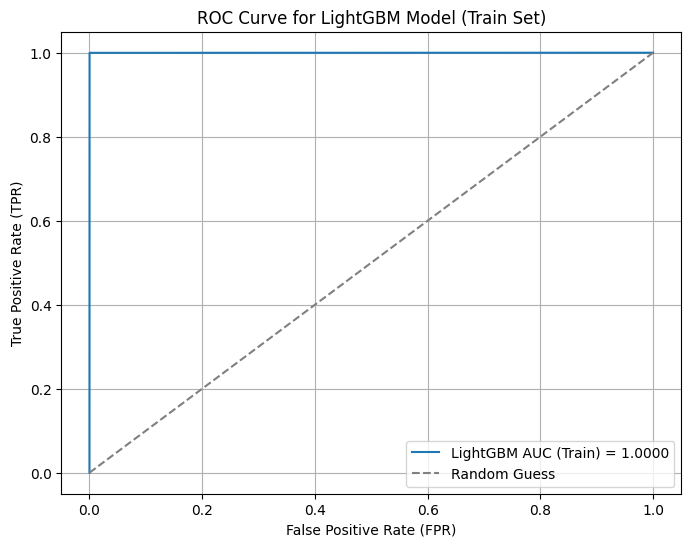

AUC-ROC Score (Train Set - LightGBM): 1.0000


In [63]:
lgb_prob_train = model_lgb_2.predict_proba(X_train)[:, 1]

fpr_lgb_train, tpr_lgb_train, thresholds_lgb_train = roc_curve(y_train, lgb_prob_train)

auc_lgb_train = roc_auc_score(y_train, lgb_prob_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb_train, tpr_lgb_train, label=f"LightGBM AUC (Train) = {auc_lgb_train:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.title('ROC Curve for LightGBM Model (Train Set)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f"AUC-ROC Score (Train Set - LightGBM): {auc_lgb_train:.4f}")

#### Metrics (test)

In [64]:
model_lgb_2 = lgb_random_search.best_estimator_
y_pred_best_lgb = model_lgb_2.predict(X_test)

rmse_best_lgb = mean_squared_error(y_test, y_pred_best_lgb, squared=False)
r2_best_lgb = r2_score(y_test, y_pred_best_lgb)

print(f"RMSE (Best LightGBM): {rmse_best_lgb}")
print(f"R² Score (Best LightGBM): {r2_best_lgb}")

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
RMSE (Best LightGBM): 0.02178012226208632
R² Score (Best LightGBM): 0.9980710100018528


/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [65]:
lgb_prob = model_lgb_2.predict(X_test)
# lgb_pred = [1 if x > 0.5 else 0 for x in ran_prob]

cm_lgb = confusion_matrix(y_test, lgb_prob)
lgb_acc = accuracy(cm_lgb)
lgb_TPR = TPR(cm_lgb)
lgb_FPR = FPR(cm_lgb)
lgb_PRE = PRE(cm_lgb)
print ("Confusion Matrix: \n", cm_lgb)
print (f'Accuracy: {lgb_acc:.4f}')
print (f'True Positive Rate: {lgb_TPR:.4f}')
print (f'False Positive Rate: {lgb_FPR:.4f}')
print (f'Precision: {lgb_PRE:.4f}')

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Confusion Matrix: 
 [[55849    20]
 [   27 43182]]
Accuracy: 0.9995
True Positive Rate: 0.9994
False Positive Rate: 0.0004
Precision: 0.9995


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


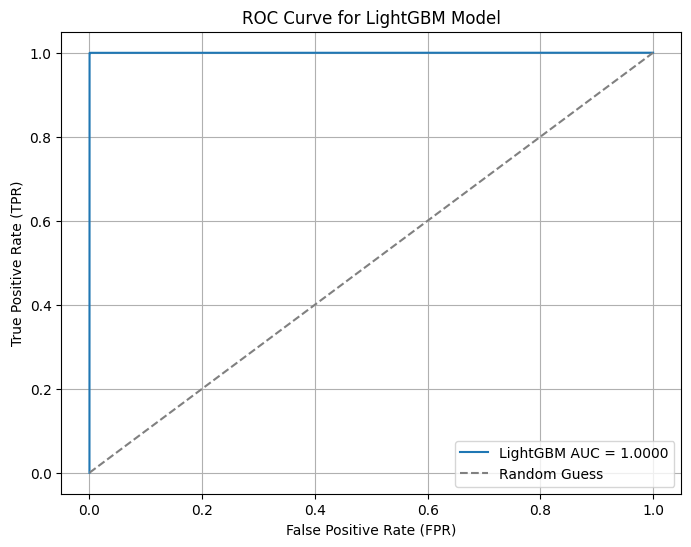

AUC-ROC Score (LightGBM): 1.0000


In [66]:
lgb_prob = model_lgb_2.predict_proba(X_test)[:, 1]

fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, lgb_prob)

auc_lgb = roc_auc_score(y_test, lgb_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label=f"LightGBM AUC = {auc_lgb:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.title('ROC Curve for LightGBM Model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f"AUC-ROC Score (LightGBM): {auc_lgb:.4f}")


### Model Ensembling

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


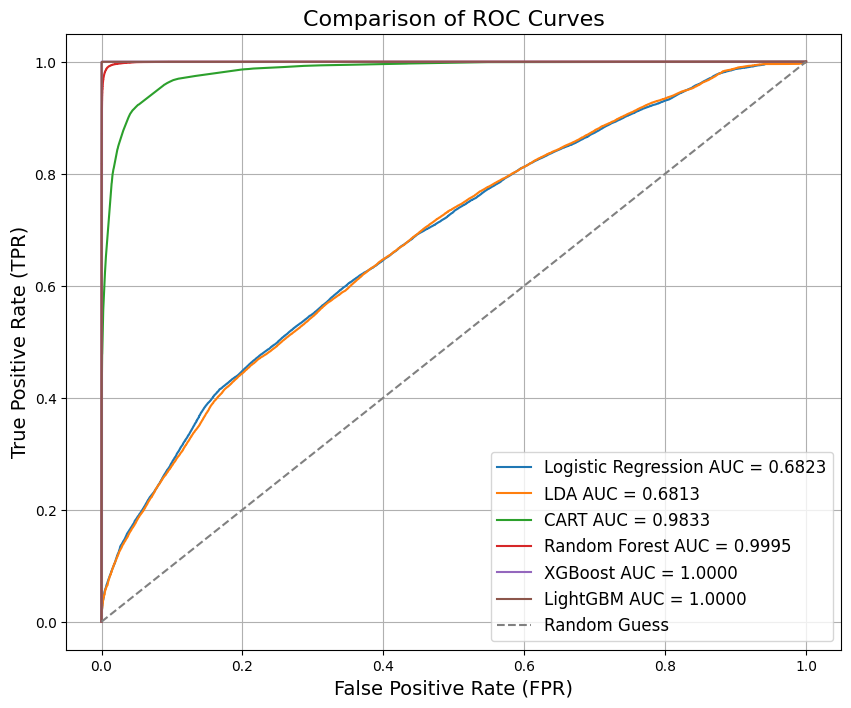

In [68]:
# 1. Logistic Regression
logit_prob = model_logit_3.predict(df_test)
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit_prob)
auc_logit = roc_auc_score(y_test, logit_prob)

# 2. LDA
lda_prob = lda_model.predict_proba(X_test)[:, 1]
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_prob)
auc_lda = roc_auc_score(y_test, lda_prob)

# 3. CART
cart_prob = dtc_cv_auc.best_estimator_.predict_proba(X_test)[:, 1]
fpr_cart, tpr_cart, _ = roc_curve(y_test, cart_prob)
auc_cart = roc_auc_score(y_test, cart_prob)

# 4. Random Forest
rf_prob = model_rf_2.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
auc_rf = roc_auc_score(y_test, rf_prob)

# 5. XGBoost
xgb_prob = model_xgb_2.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)
auc_xgb = roc_auc_score(y_test, xgb_prob)

# 6. LightGBM
lgb_prob = model_lgb_2.predict_proba(X_test)[:, 1]
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_prob)
auc_lgb = roc_auc_score(y_test, lgb_prob)

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_logit, tpr_logit, label=f"Logistic Regression AUC = {auc_logit:.4f}")
plt.plot(fpr_lda, tpr_lda, label=f"LDA AUC = {auc_lda:.4f}")
plt.plot(fpr_cart, tpr_cart, label=f"CART AUC = {auc_cart:.4f}")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest AUC = {auc_rf:.4f}")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost AUC = {auc_xgb:.4f}")
plt.plot(fpr_lgb, tpr_lgb, label=f"LightGBM AUC = {auc_lgb:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")  # Random guess line

# Customize plot
plt.title('Comparison of ROC Curves', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid()
plt.show()


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


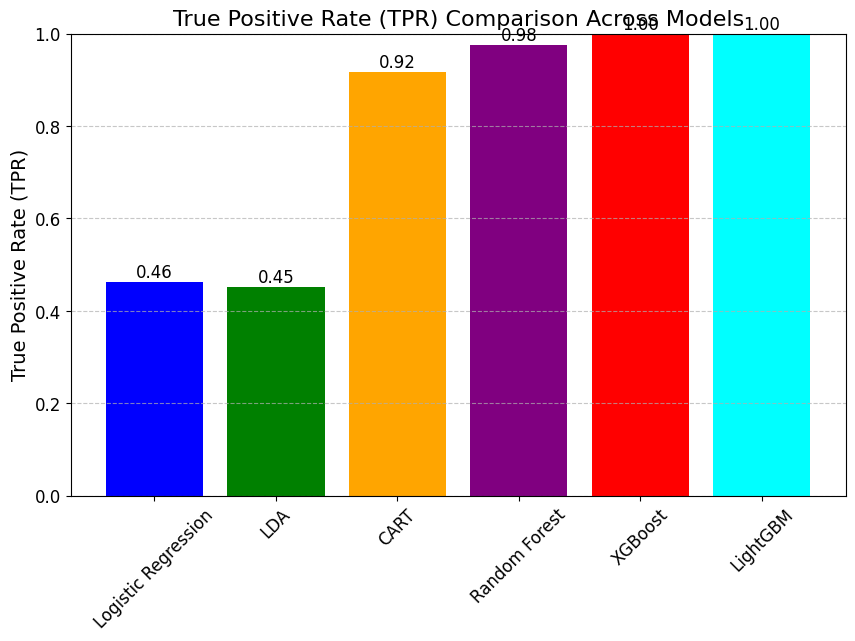

In [69]:
# 1. Logistic Regression
logit_pred = (model_logit_3.predict(df_test) > 0.5).astype(int)
cm_logit = confusion_matrix(y_test, logit_pred)
tpr_logit = cm_logit[1, 1] / (cm_logit[1, 1] + cm_logit[1, 0])

# 2. LDA
lda_pred = (lda_model.predict(X_test) > 0.5).astype(int)
cm_lda = confusion_matrix(y_test, lda_pred)
tpr_lda = cm_lda[1, 1] / (cm_lda[1, 1] + cm_lda[1, 0])

# 3. CART
cart_pred = (dtc_cv_auc.best_estimator_.predict(X_test) > 0.5).astype(int)
cm_cart = confusion_matrix(y_test, cart_pred)
tpr_cart = cm_cart[1, 1] / (cm_cart[1, 1] + cm_cart[1, 0])

# 4. Random Forest
rf_pred = (model_rf_2.predict(X_test) > 0.5).astype(int)
cm_rf = confusion_matrix(y_test, rf_pred)
tpr_rf = cm_rf[1, 1] / (cm_rf[1, 1] + cm_rf[1, 0])

# 5. XGBoost
xgb_pred = (model_xgb_2.predict(X_test) > 0.5).astype(int)
cm_xgb = confusion_matrix(y_test, xgb_pred)
tpr_xgb = cm_xgb[1, 1] / (cm_xgb[1, 1] + cm_xgb[1, 0])

# 6. LightGBM
lgb_pred = (model_lgb_2.predict(X_test) > 0.5).astype(int)
cm_lgb = confusion_matrix(y_test, lgb_pred)
tpr_lgb = cm_lgb[1, 1] / (cm_lgb[1, 1] + cm_lgb[1, 0])

models = ['Logistic Regression', 'LDA', 'CART', 'Random Forest', 'XGBoost', 'LightGBM']
tpr_values = [tpr_logit, tpr_lda, tpr_cart, tpr_rf, tpr_xgb, tpr_lgb]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, tpr_values, color=['blue', 'green', 'orange', 'purple', 'red', 'cyan'])
plt.title('True Positive Rate (TPR) Comparison Across Models', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, tpr in zip(bars, tpr_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f'{tpr:.2f}', ha='center', fontsize=12)

plt.show()


#### Hard Voting

In [70]:
from sklearn.ensemble import VotingClassifier
ensemble_hard = VotingClassifier(estimators=[
    ('RF', model_rf_2),
    ('XGB', model_xgb_2),
    ('LGB', model_lgb_2)
], voting='hard')

ensemble_hard.fit(X_train, y_train)

predictions_hard = ensemble_hard.predict(X_test)

cm_ensemble_hard = confusion_matrix(y_test, predictions_hard)

TP = cm_ensemble_hard[1, 1]
TN = cm_ensemble_hard[0, 0]
FP = cm_ensemble_hard[0, 1]
FN = cm_ensemble_hard[1, 0]

# Accuracy
accuracy_hard = (TP + TN) / cm_ensemble_hard.sum()

# True Positive Rate (TPR) / Recall
TPR = TP / (TP + FN)

# False Positive Rate (FPR)
FPR = FP / (FP + TN)

# Precision
Precision = TP / (TP + FP)

print("Confusion Matrix (Hard Voting):\n", cm_ensemble_hard)
print(f"Accuracy (Hard Voting): {accuracy_hard:.4f}")
print(f"True Positive Rate: {TPR:.4f}")
print(f"False Positive Rate: {FPR:.4f}")
print(f"Precision: {Precision:.4f}")

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 100998, number of negative: 130182
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3323
[LightGBM] [Info] Number of data points in the train set: 231180, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.436880 -> initscore=-0.253833
[LightGBM] [Info] Start training from score -0.253833
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Confusion Matrix (Hard Voting):
 [[55851    18]
 [   24 43185]]
Acc

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


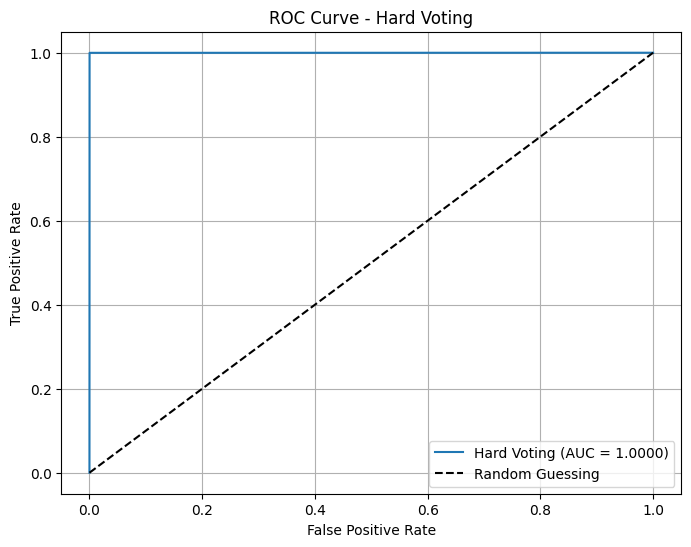

AUC-ROC Score (Hard Voting): 1.0000


In [71]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

rf_prob = model_rf_2.predict_proba(X_test)[:, 1]
xgb_prob = model_xgb_2.predict_proba(X_test)[:, 1]
lgb_prob = model_lgb_2.predict_proba(X_test)[:, 1]

hard_vote_prob = (rf_prob + xgb_prob + lgb_prob) / 3

fpr, tpr, thresholds = roc_curve(y_test, hard_vote_prob)
auc_score = roc_auc_score(y_test, hard_vote_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Hard Voting (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # 對角線
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Hard Voting')
plt.legend(loc='best')
plt.grid()
plt.show()
print(f"AUC-ROC Score (Hard Voting): {auc_score:.4f}")

#### metrics (train)

In [72]:
predictions_hard_train = ensemble_hard.predict(X_train)

cm_ensemble_hard_train = confusion_matrix(y_train, predictions_hard_train)

TP_train = cm_ensemble_hard_train[1, 1]
TN_train = cm_ensemble_hard_train[0, 0]
FP_train = cm_ensemble_hard_train[0, 1]
FN_train = cm_ensemble_hard_train[1, 0]

# Accuracy
accuracy_hard_train = (TP_train + TN_train) / cm_ensemble_hard_train.sum()

# True Positive Rate (TPR) / Recall
TPR_train = TP_train / (TP_train + FN_train)

# False Positive Rate (FPR)
FPR_train = FP_train / (FP_train + TN_train)

# Precision
Precision_train = TP_train / (TP_train + FP_train)

print("Confusion Matrix (Hard Voting - Train):\n", cm_ensemble_hard_train)
print(f"Accuracy (Hard Voting - Train): {accuracy_hard_train:.4f}")
print(f"True Positive Rate (Train): {TPR_train:.4f}")
print(f"False Positive Rate (Train): {FPR_train:.4f}")
print(f"Precision (Train): {Precision_train:.4f}")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Confusion Matrix (Hard Voting - Train):
 [[130171     11]
 [    42 100956]]
Accuracy (Hard Voting - Train): 0.9998
True Positive Rate (Train): 0.9996
False Positive Rate (Train): 0.0001
Precision (Train): 0.9999


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


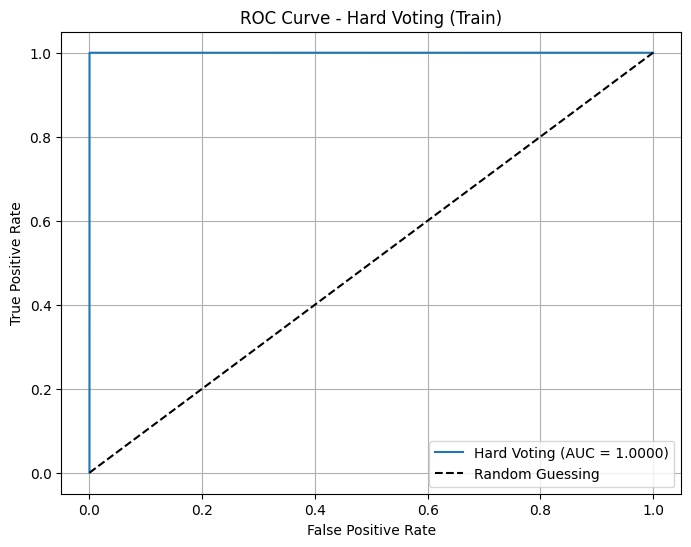

AUC-ROC Score (Hard Voting - Train): 1.0000


In [73]:
rf_prob_train = model_rf_2.predict_proba(X_train)[:, 1]
xgb_prob_train = model_xgb_2.predict_proba(X_train)[:, 1]
lgb_prob_train = model_lgb_2.predict_proba(X_train)[:, 1]

hard_vote_prob_train = (rf_prob_train + xgb_prob_train + lgb_prob_train) / 3

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, hard_vote_prob_train)
auc_score_train = roc_auc_score(y_train, hard_vote_prob_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Hard Voting (AUC = {auc_score_train:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # 對角線
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Hard Voting (Train)')
plt.legend(loc='best')
plt.grid()
plt.show()

print(f"AUC-ROC Score (Hard Voting - Train): {auc_score_train:.4f}")

#### Soft Voting

In [74]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix

ensemble_soft = VotingClassifier(estimators=[
    ('RF', model_rf_2),
    ('XGB', model_xgb_2),
], voting='soft')

ensemble_soft.fit(X_train, y_train)

predictions_soft = ensemble_soft.predict(X_test)

cm_ensemble_soft = confusion_matrix(y_test, predictions_soft)

accuracy_soft = (cm_ensemble_soft[0, 0] + cm_ensemble_soft[1, 1]) / cm_ensemble_soft.sum()
TP = cm_ensemble_soft[1, 1]
TN = cm_ensemble_soft[0, 0]
FP = cm_ensemble_soft[0, 1]
FN = cm_ensemble_soft[1, 0]

TPR_soft = TP / (TP + FN)

FPR_soft = FP / (FP + TN)

Precision_soft = TP / (TP + FP)

print("Confusion Matrix (Soft Voting):\n", cm_ensemble_soft)
print(f"Accuracy: {accuracy_soft:.4f}")
print(f"True Positive Rate: {TPR_soft:.4f}")
print(f"False Positive Rate: {FPR_soft:.4f}")
print(f"Precision: {Precision_soft:.4f}")


Confusion Matrix (Soft Voting):
 [[55859    10]
 [   10 43199]]
Accuracy: 0.9998
True Positive Rate: 0.9998
False Positive Rate: 0.0002
Precision: 0.9998


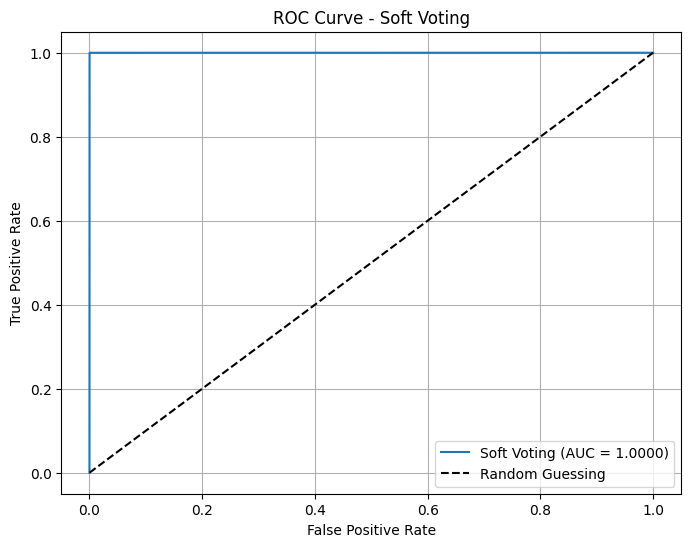

AUC-ROC Score (Soft Voting): 1.0000


In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_soft = ensemble_soft.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_soft)
auc_score_soft = roc_auc_score(y_test, y_prob_soft)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Soft Voting (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Soft Voting')
plt.legend(loc='best')
plt.grid()
plt.show()
print(f"AUC-ROC Score (Soft Voting): {auc_score_soft:.4f}")

#### Metrics (train)

In [76]:
predictions_soft_train = ensemble_soft.predict(X_train)

cm_ensemble_soft_train = confusion_matrix(y_train, predictions_soft_train)

accuracy_soft_train = (cm_ensemble_soft_train[0, 0] + cm_ensemble_soft_train[1, 1]) / cm_ensemble_soft_train.sum()
TP_train = cm_ensemble_soft_train[1, 1]
TN_train = cm_ensemble_soft_train[0, 0]
FP_train = cm_ensemble_soft_train[0, 1]
FN_train = cm_ensemble_soft_train[1, 0]

# True Positive Rate (TPR) / Recall
TPR_soft_train = TP_train / (TP_train + FN_train)

# False Positive Rate (FPR)
FPR_soft_train = FP_train / (FP_train + TN_train)

# Precision
Precision_soft_train = TP_train / (TP_train + FP_train)

print("Confusion Matrix (Soft Voting - Train):\n", cm_ensemble_soft_train)
print(f"Accuracy (Train): {accuracy_soft_train:.4f}")
print(f"True Positive Rate (Train): {TPR_soft_train:.4f}")
print(f"False Positive Rate (Train): {FPR_soft_train:.4f}")
print(f"Precision (Train): {Precision_soft_train:.4f}")

Confusion Matrix (Soft Voting - Train):
 [[130178      4]
 [     5 100993]]
Accuracy (Train): 1.0000
True Positive Rate (Train): 1.0000
False Positive Rate (Train): 0.0000
Precision (Train): 1.0000


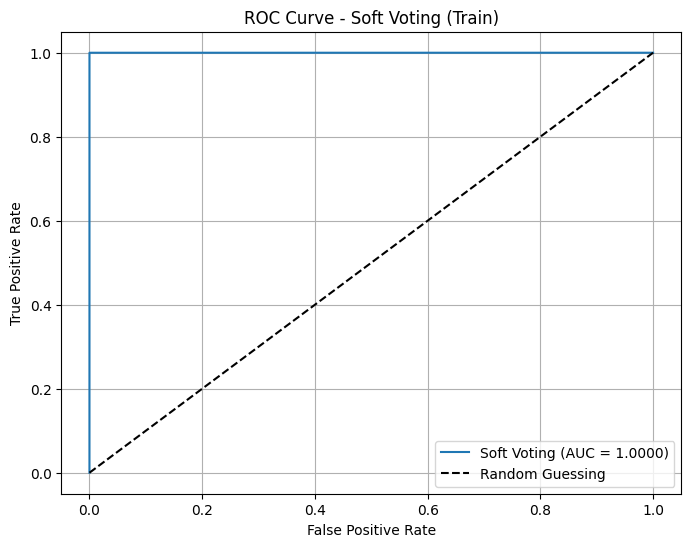

AUC-ROC Score (Soft Voting - Train): 1.0000


In [77]:
y_prob_soft_train = ensemble_soft.predict_proba(X_train)[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_soft_train)
auc_score_soft_train = roc_auc_score(y_train, y_prob_soft_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Soft Voting (AUC = {auc_score_soft_train:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Soft Voting (Train)')
plt.legend(loc='best')
plt.grid()
plt.show()

print(f"AUC-ROC Score (Soft Voting - Train): {auc_score_soft_train:.4f}")

### Model Evaluation

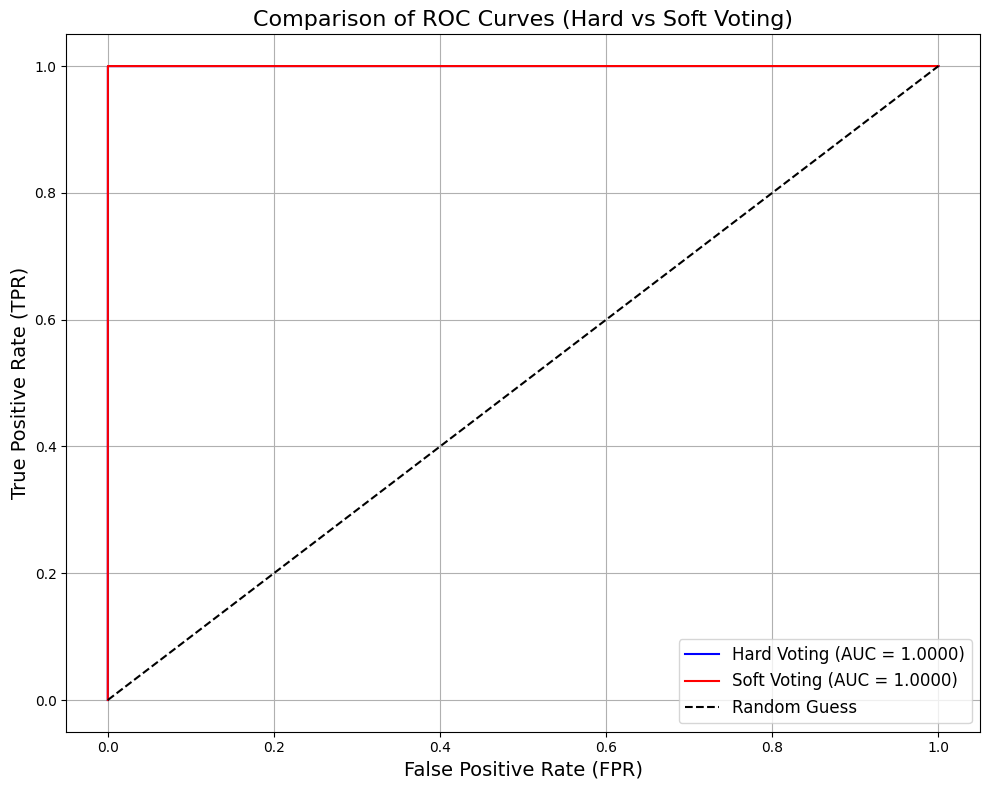

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr_hard, tpr_hard, thresholds_hard = roc_curve(y_test, hard_vote_prob)
auc_score_hard = roc_auc_score(y_test, hard_vote_prob)

fpr_soft, tpr_soft, thresholds_soft = roc_curve(y_test, y_prob_soft)
auc_score_soft = roc_auc_score(y_test, y_prob_soft)

plt.figure(figsize=(10, 8))

# Hard Voting ROC
plt.plot(fpr_hard, tpr_hard, label=f'Hard Voting (AUC = {auc_score_hard:.4f})', color='blue', linestyle='-')

# Soft Voting ROC
plt.plot(fpr_soft, tpr_soft, label=f'Soft Voting (AUC = {auc_score_soft:.4f})', color='red', linestyle='-')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.title('Comparison of ROC Curves (Hard vs Soft Voting)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid()

plt.tight_layout()
plt.show()

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


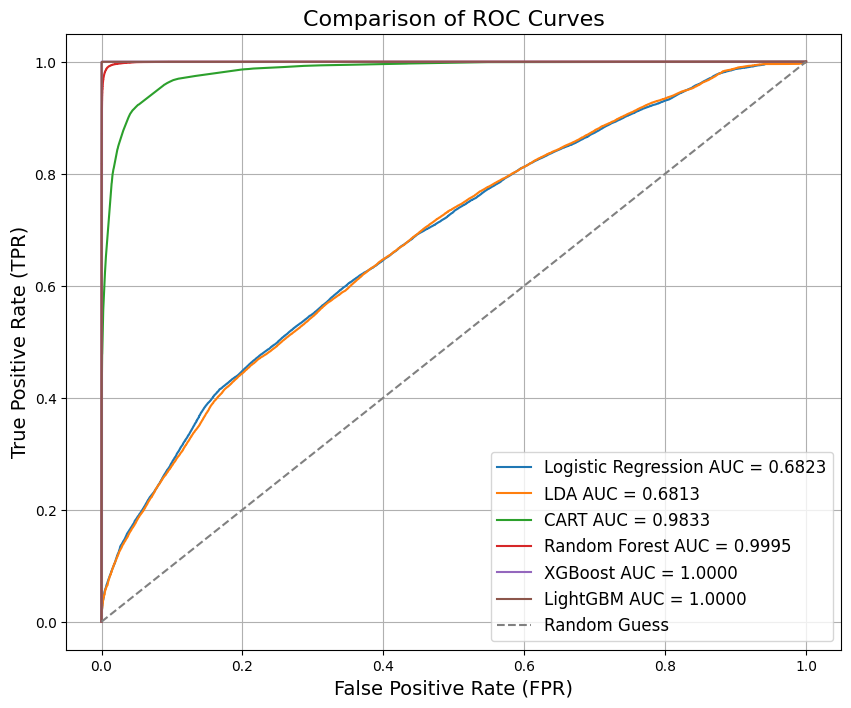

In [79]:
# 1. Logistic Regression
logit_prob = model_logit_3.predict(df_test)
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit_prob)
auc_logit = roc_auc_score(y_test, logit_prob)

# 2. LDA
lda_prob = lda_model.predict_proba(X_test)[:, 1]
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_prob)
auc_lda = roc_auc_score(y_test, lda_prob)

# 3. CART
cart_prob = dtc_cv_auc.best_estimator_.predict_proba(X_test)[:, 1]
fpr_cart, tpr_cart, _ = roc_curve(y_test, cart_prob)
auc_cart = roc_auc_score(y_test, cart_prob)

# 4. Random Forest
rf_prob = model_rf_2.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
auc_rf = roc_auc_score(y_test, rf_prob)

# 5. XGBoost
xgb_prob = model_xgb_2.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)
auc_xgb = roc_auc_score(y_test, xgb_prob)

# 6. LightGBM
lgb_prob = model_lgb_2.predict_proba(X_test)[:, 1]
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_prob)
auc_lgb = roc_auc_score(y_test, lgb_prob)

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_logit, tpr_logit, label=f"Logistic Regression AUC = {auc_logit:.4f}")
plt.plot(fpr_lda, tpr_lda, label=f"LDA AUC = {auc_lda:.4f}")
plt.plot(fpr_cart, tpr_cart, label=f"CART AUC = {auc_cart:.4f}")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest AUC = {auc_rf:.4f}")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost AUC = {auc_xgb:.4f}")
plt.plot(fpr_lgb, tpr_lgb, label=f"LightGBM AUC = {auc_lgb:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")  # Random guess line

# Customize plot
plt.title('Comparison of ROC Curves', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid()
plt.show()


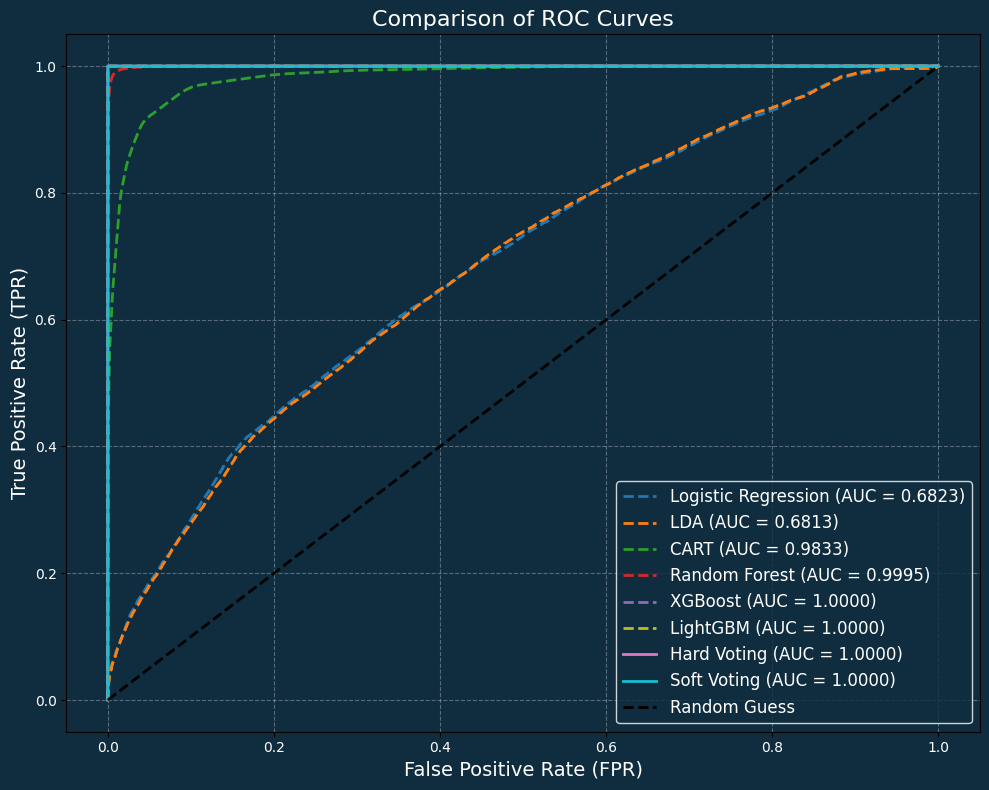

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 8))
ax = plt.gca()
fig = plt.gcf()

fig.patch.set_facecolor('#0f2d3f')
ax.set_facecolor('#0f2d3f')

plt.plot(fpr_logit, tpr_logit, label=f"Logistic Regression (AUC = {auc_logit:.4f})",
         color='#1f77b4', linestyle='--', linewidth=2)

plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC = {auc_lda:.4f})",
         color='#ff7f0e', linestyle='--', linewidth=2)

plt.plot(fpr_cart, tpr_cart, label=f"CART (AUC = {auc_cart:.4f})",
         color='#2ca02c', linestyle='--', linewidth=2)

plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.4f})",
         color='#d62728', linestyle='--', linewidth=2)

plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.4f})",
         color='#9467bd', linestyle='--', linewidth=2)

plt.plot(fpr_lgb, tpr_lgb, label=f"LightGBM (AUC = {auc_lgb:.4f})",
         color='#bcbd22', linestyle='--', linewidth=2)

plt.plot(fpr_hard, tpr_hard, label=f"Hard Voting (AUC = {auc_score_hard:.4f})",
         color='#e377c2', linestyle='-', linewidth=2)

plt.plot(fpr_soft, tpr_soft, label=f"Soft Voting (AUC = {auc_score_soft:.4f})",
         color='#17becf', linestyle='-', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", linewidth=2)

plt.title('Comparison of ROC Curves', fontsize=16, color='white')
plt.xlabel('False Positive Rate (FPR)', fontsize=14, color='white')
plt.ylabel('True Positive Rate (TPR)', fontsize=14, color='white')

plt.xticks(color='white')
plt.yticks(color='white')

legend = plt.legend(loc='lower right', fontsize=12, labelspacing=0.5, frameon=True)
frame = legend.get_frame()
frame.set_facecolor('#0f2d3f')
frame.set_edgecolor('white')
for text in legend.get_texts():
    text.set_color('white')

plt.grid(color='white', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig("roc_comparison.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


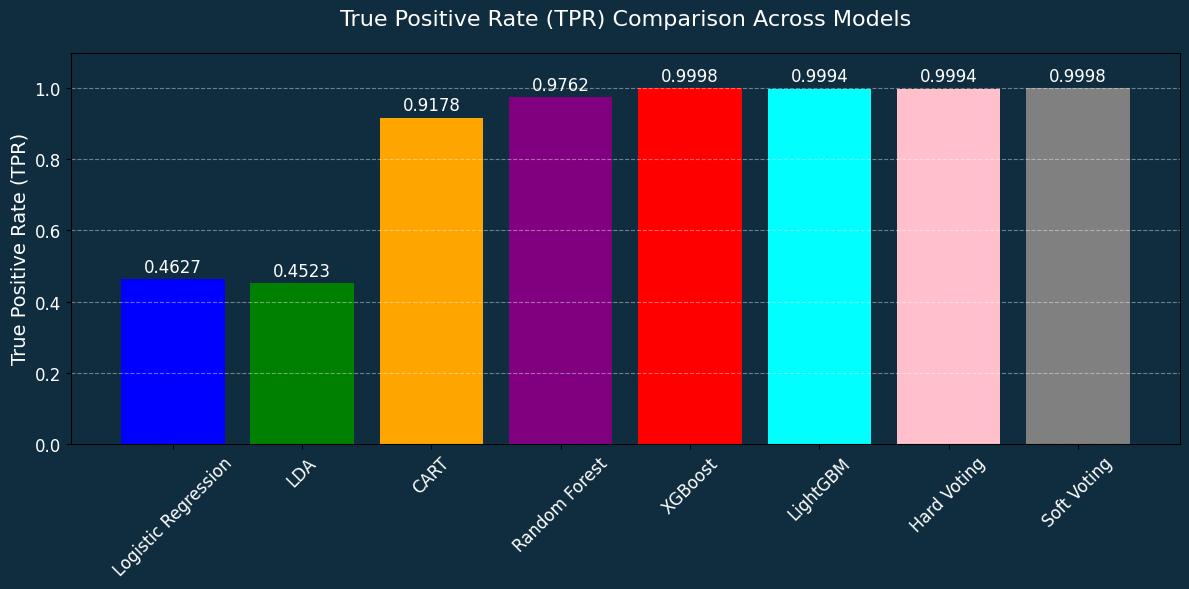

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Logistic Regression
logit_pred = (model_logit_3.predict(df_test) > 0.5).astype(int)
cm_logit = confusion_matrix(y_test, logit_pred)
tpr_logit = cm_logit[1, 1] / (cm_logit[1, 1] + cm_logit[1, 0])

# LDA
lda_pred = (lda_model.predict(X_test) > 0.5).astype(int)
cm_lda = confusion_matrix(y_test, lda_pred)
tpr_lda = cm_lda[1, 1] / (cm_lda[1, 1] + cm_lda[1, 0])

# CART
cart_pred = (dtc_cv_auc.best_estimator_.predict(X_test) > 0.5).astype(int)
cm_cart = confusion_matrix(y_test, cart_pred)
tpr_cart = cm_cart[1, 1] / (cm_cart[1, 1] + cm_cart[1, 0])

# Random Forest
rf_pred = (model_rf_2.predict(X_test) > 0.5).astype(int)
cm_rf = confusion_matrix(y_test, rf_pred)
tpr_rf = cm_rf[1, 1] / (cm_rf[1, 1] + cm_rf[1, 0])

# XGBoost
xgb_pred = (model_xgb_2.predict(X_test) > 0.5).astype(int)
cm_xgb = confusion_matrix(y_test, xgb_pred)
tpr_xgb = cm_xgb[1, 1] / (cm_xgb[1, 1] + cm_xgb[1, 0])

# LightGBM
lgb_pred = (model_lgb_2.predict(X_test) > 0.5).astype(int)
cm_lgb = confusion_matrix(y_test, lgb_pred)
tpr_lgb = cm_lgb[1, 1] / (cm_lgb[1, 1] + cm_lgb[1, 0])

# Hard Voting
hard_pred = ensemble_hard.predict(X_test)
cm_hard = confusion_matrix(y_test, hard_pred)
tpr_hard = cm_hard[1, 1] / (cm_hard[1, 1] + cm_hard[1, 0])

# Soft Voting
soft_pred = ensemble_soft.predict(X_test)
cm_soft = confusion_matrix(y_test, soft_pred)
tpr_soft = cm_soft[1, 1] / (cm_soft[1, 1] + cm_soft[1, 0])

models = [
    'Logistic Regression', 'LDA', 'CART', 'Random Forest',
    'XGBoost', 'LightGBM', 'Hard Voting', 'Soft Voting'
]
tpr_values = [
    tpr_logit, tpr_lda, tpr_cart, tpr_rf,
    tpr_xgb, tpr_lgb, tpr_hard, tpr_soft
]

plt.figure(figsize=(12, 6))
ax = plt.gca()
fig = plt.gcf()

fig.patch.set_facecolor('#0f2d3f')
ax.set_facecolor('#0f2d3f')

bars = plt.bar(models, tpr_values, color=[
    'blue', 'green', 'orange', 'purple', 'red', 'cyan', 'pink', 'gray'
])

plt.title('True Positive Rate (TPR) Comparison Across Models', fontsize=16, pad=20, color='white')
plt.ylabel('True Positive Rate (TPR)', fontsize=14, color='white')
plt.xticks(rotation=45, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.ylim(0, 1.1)

plt.grid(axis='y', linestyle='--', alpha=0.4, color='white')
ax.xaxis.grid(False)

for bar, tpr in zip(bars, tpr_values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.02,
             f'{tpr:.4f}',
             ha='center', fontsize=12, color='white')

plt.tight_layout()
plt.savefig("TPR_comparison.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()



#### Boot Strapping

#### a. Random Forest

In [82]:
from sklearn.utils import resample
import numpy as np
from sklearn.metrics import confusion_matrix

# Parameters
n_estimators = 50  # Bagging iterations
sample_ratio = 0.6  # Use 60% of the training data for each resample
tpr_values = []  # Store TPR for each iteration

# Perform Bagging using the fixed sample
for i in range(n_estimators):
    # Resample the training data
    X_resampled, y_resampled = resample(X_test, y_test, n_samples=int(len(X_test) * sample_ratio), random_state=100 + i)

    # Predict on the resampled test set using the fixed model
    y_pred_resampled = model_rf_2.predict(X_resampled)

    # Calculate confusion matrix and TPR
    cm = confusion_matrix(y_resampled, y_pred_resampled)
    tpr = cm[1, 1] / (cm[1, 0] + cm[1, 1])  # TPR = TP / (TP + FN)
    tpr_values.append(tpr)

# Calculate 5th and 95th percentiles for TPR
lower_bound_tpr = np.percentile(tpr_values, 5)
upper_bound_tpr = np.percentile(tpr_values, 95)

# Print results
print(f"Bagging TPR Confidence Interval:")
print(f"Lower Bound (5%): {lower_bound_tpr:.4f}")
print(f"Upper Bound (95%): {upper_bound_tpr:.4f}")
print(f"Mean TPR: {np.mean(tpr_values):.4f}")


Bagging TPR Confidence Interval:
Lower Bound (5%): 0.9745
Upper Bound (95%): 0.9773
Mean TPR: 0.9761


#### b. XG Boost

In [83]:
from sklearn.utils import resample
import numpy as np
from sklearn.metrics import confusion_matrix

# Parameters
n_estimators = 50  # Bagging iterations
sample_ratio = 0.6  # Use 60% of the training data for each resample
tpr_values = []  # Store TPR for each iteration

# Perform Bagging using the fixed sample
for i in range(n_estimators):
    # Resample the training data
    X_resampled, y_resampled = resample(X_test, y_test, n_samples=int(len(X_test) * sample_ratio), random_state=100 + i)

    # Predict on the resampled test set using the fixed model
    y_pred_resampled = model_xgb_2.predict(X_resampled)

    # Calculate confusion matrix and TPR
    cm = confusion_matrix(y_resampled, y_pred_resampled)
    tpr = cm[1, 1] / (cm[1, 0] + cm[1, 1])  # TPR = TP / (TP + FN)
    tpr_values.append(tpr)

# Calculate 5th and 95th percentiles for TPR
lower_bound_tpr = np.percentile(tpr_values, 5)
upper_bound_tpr = np.percentile(tpr_values, 95)

# Print results
print(f"Bagging TPR Confidence Interval:")
print(f"Lower Bound (5%): {lower_bound_tpr:.4f}")
print(f"Upper Bound (95%): {upper_bound_tpr:.4f}")
print(f"Mean TPR: {np.mean(tpr_values):.4f}")

Bagging TPR Confidence Interval:
Lower Bound (5%): 0.9997
Upper Bound (95%): 1.0000
Mean TPR: 0.9998


#### c. Light GBM

In [84]:
from sklearn.utils import resample
import numpy as np
from sklearn.metrics import confusion_matrix

# Parameters
n_estimators = 50  # Bagging iterations
sample_ratio = 0.6  # Use 60% of the training data for each resample
tpr_values = []  # Store TPR for each iteration

# Perform Bagging using the fixed sample
for i in range(n_estimators):
    # Resample the training data
    X_resampled, y_resampled = resample(X_test, y_test, n_samples=int(len(X_test) * sample_ratio), random_state=100 + i)

    # Predict on the resampled test set using the fixed model
    y_pred_resampled = model_lgb_2.predict(X_resampled)

    # Calculate confusion matrix and TPR
    cm = confusion_matrix(y_resampled, y_pred_resampled)
    tpr = cm[1, 1] / (cm[1, 0] + cm[1, 1])  # TPR = TP / (TP + FN)
    tpr_values.append(tpr)

# Calculate 5th and 95th percentiles for TPR
lower_bound_tpr = np.percentile(tpr_values, 5)
upper_bound_tpr = np.percentile(tpr_values, 95)

# Print results
print(f"Bagging TPR Confidence Interval:")
print(f"Lower Bound (5%): {lower_bound_tpr:.4f}")
print(f"Upper Bound (95%): {upper_bound_tpr:.4f}")
print(f"Mean TPR: {np.mean(tpr_values):.4f}")

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

#### d. Soft Voting

In [85]:
from sklearn.utils import resample
import numpy as np
from sklearn.metrics import confusion_matrix

# Parameters
n_estimators = 50  # Bagging iterations
sample_ratio = 0.6  # Use 60% of the training data for each resample
tpr_values = []  # Store TPR for each iteration

# Perform Bagging using the fixed sample
for i in range(n_estimators):
    # Resample the training data
    X_resampled, y_resampled = resample(X_test, y_test, n_samples=int(len(X_test) * sample_ratio), random_state=100 + i)

    # Predict on the resampled test set using the fixed model
    y_pred_resampled = ensemble_soft.predict(X_resampled)

    # Calculate confusion matrix and TPR
    cm = confusion_matrix(y_resampled, y_pred_resampled)
    tpr = cm[1, 1] / (cm[1, 0] + cm[1, 1])  # TPR = TP / (TP + FN)
    tpr_values.append(tpr)

# Calculate 5th and 95th percentiles for TPR
lower_bound_tpr = np.percentile(tpr_values, 5)
upper_bound_tpr = np.percentile(tpr_values, 95)

# Print results
print(f"Bagging TPR Confidence Interval:")
print(f"Lower Bound (5%): {lower_bound_tpr:.4f}")
print(f"Upper Bound (95%): {upper_bound_tpr:.4f}")
print(f"Mean TPR: {np.mean(tpr_values):.4f}")

Bagging TPR Confidence Interval:
Lower Bound (5%): 0.9996
Upper Bound (95%): 0.9999
Mean TPR: 0.9998


### Feature Importance

#### a. Built-in

##### Random forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

importances = model_rf.feature_importances_

feature_names = X_train.columns if hasattr(X_train, 'columns') else np.arange(X_train.shape[1])
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                    Feature  Importance
5                       OAT    0.209661
7                   E1_OilT    0.095374
8                     FQtyL    0.084349
9                     FQtyR    0.074013
2                     volt1    0.071402
3                      amp1    0.067935
6                   E1_OilP    0.063476
10           Temp_Imbalance    0.054843
15                 E1_FFlow    0.048109
1                   E1_EGT2    0.047711
11     Normalized_Air_Speed    0.047286
0                   E1_CHT2    0.044045
12  Exhaust_Gas_Temp_Spread    0.035459
13       Thermal_Efficiency    0.028873
4                      amp2    0.017057
14       Voltage_Difference    0.010406


/var/folders/2t/pr7qq6yd0bsgmdcbvr8qthv00000gn/T/ipykernel_30662/176781101.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


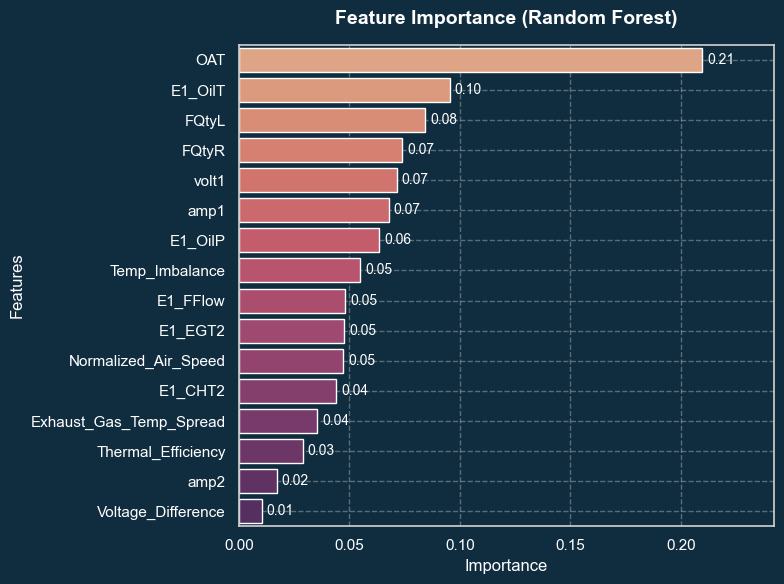

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = plt.gca()
fig = plt.gcf()

fig.patch.set_facecolor('#0f2d3f')
ax.set_facecolor('#0f2d3f')

ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    orient='h',
    palette='flare'
)

current_xlim = ax.get_xlim()
ax.set_xlim(0, current_xlim[1] * 1.1)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + (current_xlim[1]*0.01),
            p.get_y() + p.get_height()/2,
            f'{width:.2f}',
            ha='left', va='center',
            fontsize=10, color='white')

plt.title("Feature Importance (Random Forest)", fontsize=14, fontweight='bold', color='white', pad=15)
plt.xlabel("Importance", color='white', fontsize=12)
plt.ylabel("Features", color='white', fontsize=12)

ax.tick_params(colors='white')

plt.grid(axis='x', color='white', linestyle='--', alpha=0.3)
plt.grid(axis='y', color='white', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig("Feature_Importance_RF.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()

##### XGBoost

In [88]:
importance = model_xgb_2.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
print(importance_df)

                    Feature  Importance
2                     volt1  139.893066
5                       OAT   74.209007
4                      amp2   72.563049
11     Normalized_Air_Speed   70.261276
14       Voltage_Difference   65.536835
3                      amp1   65.194168
6                   E1_OilP   61.055954
8                     FQtyL   59.445877
7                   E1_OilT   54.706455
9                     FQtyR   45.624519
10           Temp_Imbalance   45.473927
1                   E1_EGT2   43.548832
15                 E1_FFlow   40.341915
0                   E1_CHT2   32.334782
12  Exhaust_Gas_Temp_Spread   29.288420
13       Thermal_Efficiency   21.718000


/var/folders/2t/pr7qq6yd0bsgmdcbvr8qthv00000gn/T/ipykernel_30662/1756214971.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


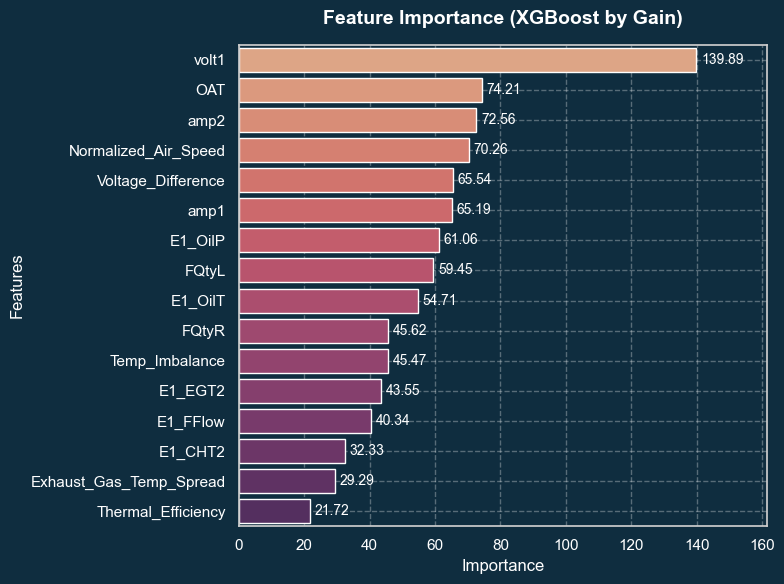

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importance = model_xgb_2.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = plt.gca()
fig = plt.gcf()

fig.patch.set_facecolor('#0f2d3f')
ax.set_facecolor('#0f2d3f')

ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    orient='h',
    palette='flare'
)

current_xlim = ax.get_xlim()
ax.set_xlim(0, current_xlim[1] * 1.1)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + (current_xlim[1]*0.01),
            p.get_y() + p.get_height()/2,
            f'{width:.2f}',
            ha='left', va='center',
            fontsize=10, color='white')

plt.title("Feature Importance (XGBoost by Gain)", fontsize=14, fontweight='bold', color='white', pad=15)
plt.xlabel("Importance", fontsize=12, color='white')
plt.ylabel("Features", fontsize=12, color='white')

ax.tick_params(colors='white')

plt.grid(axis='x', color='white', linestyle='--', alpha=0.3)
plt.grid(axis='y', color='white', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig("Feature_Importance_XGBoost.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()


#### b. Permutation Importance

In [90]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    ensemble_soft, X_test, y_test,
    scoring='recall', random_state=2024, n_repeats=5
)

perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean,
    'Std': result.importances_std
}).sort_values(by='Importance', ascending=False)

print(perm_importance_df.head(10))

                 Feature  Importance       Std
5                    OAT    0.240269  0.001169
7                E1_OilT    0.066606  0.000394
9                  FQtyR    0.055368  0.000643
2                  volt1    0.043366  0.001041
3                   amp1    0.031892  0.000899
6                E1_OilP    0.030980  0.000771
8                  FQtyL    0.029934  0.000672
11  Normalized_Air_Speed    0.009706  0.000419
10        Temp_Imbalance    0.006443  0.000430
0                E1_CHT2    0.003985  0.000191


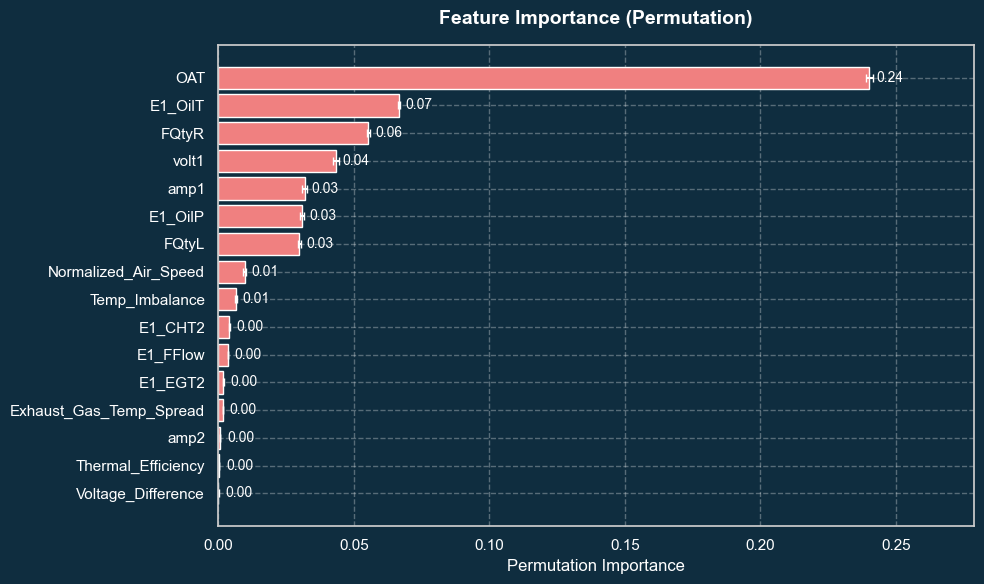

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = plt.gca()
fig = plt.gcf()

fig.patch.set_facecolor('#0f2d3f')
ax.set_facecolor('#0f2d3f')

bars = ax.barh(
    perm_importance_df['Feature'],
    perm_importance_df['Importance'],
    xerr=perm_importance_df['Std'],
    align='center',
    color='lightcoral',
    ecolor='white',
    capsize=3
)

ax.invert_yaxis()

current_xlim = ax.get_xlim()
ax.set_xlim(0, current_xlim[1] * 1.1)

for bar, imp in zip(bars, perm_importance_df['Importance']):
    width = imp
    ax.text(width + (current_xlim[1]*0.01),
            bar.get_y() + bar.get_height()/2,
            f'{width:.2f}',
            ha='left', va='center',
            fontsize=10, color='white')

plt.title('Feature Importance (Permutation)', fontsize=14, fontweight='bold', color='white', pad=15)
plt.xlabel('Permutation Importance', fontsize=12, color='white')

ax.tick_params(colors='white')
plt.setp(ax.get_yticklabels(), color='white')

plt.grid(axis='x', color='white', linestyle='--', alpha=0.3)
plt.grid(axis='y', color='white', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig("PI_with_values.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()

#### c. SHAP

In [92]:
import shap

/Users/roy/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [93]:
resampled_data = data.sample(n=10000, random_state = 2024)

In [94]:
target_distribution = resampled_data['target'].value_counts()
print(target_distribution)

target
0    5581
1    4419
Name: count, dtype: int64


In [95]:
from sklearn.model_selection import train_test_split

X = resampled_data.drop(columns=['target'])
y = resampled_data['target']

X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(
    X, y, test_size=0.3, random_state=2024
)


In [96]:
explainer_rf = shap.TreeExplainer(model_rf_2)
shap_values_rf = explainer_rf.shap_values(X_resampled_test)

In [97]:
explainer = shap.Explainer(model_xgb_2, X_resampled_train)
shap_values_xgb = explainer(X_resampled_test)

 96%|=================== | 2878/3000 [00:12<00:00]       

In [98]:
shap_values_rf_selected = shap_values_rf[:, :, 1]

In [99]:
explainer_xgb = shap.Explainer(model_xgb_2, X_resampled_train)
shap_values_xgb = explainer_xgb(X_resampled_test)
shap_values_xgb_array = shap_values_xgb.values
shap_values_xgb_array = shap_values_xgb.values

 98%|===================| 2953/3000 [00:13<00:00]        

In [100]:
'''
shap_values_ensemble = (shap_values_rf_selected + shap_values_xgb_array) / 2
shap.summary_plot(shap_values_ensemble, X_resampled_test)
'''

'\nshap_values_ensemble = (shap_values_rf_selected + shap_values_xgb_array) / 2\nshap.summary_plot(shap_values_ensemble, X_resampled_test)\n'

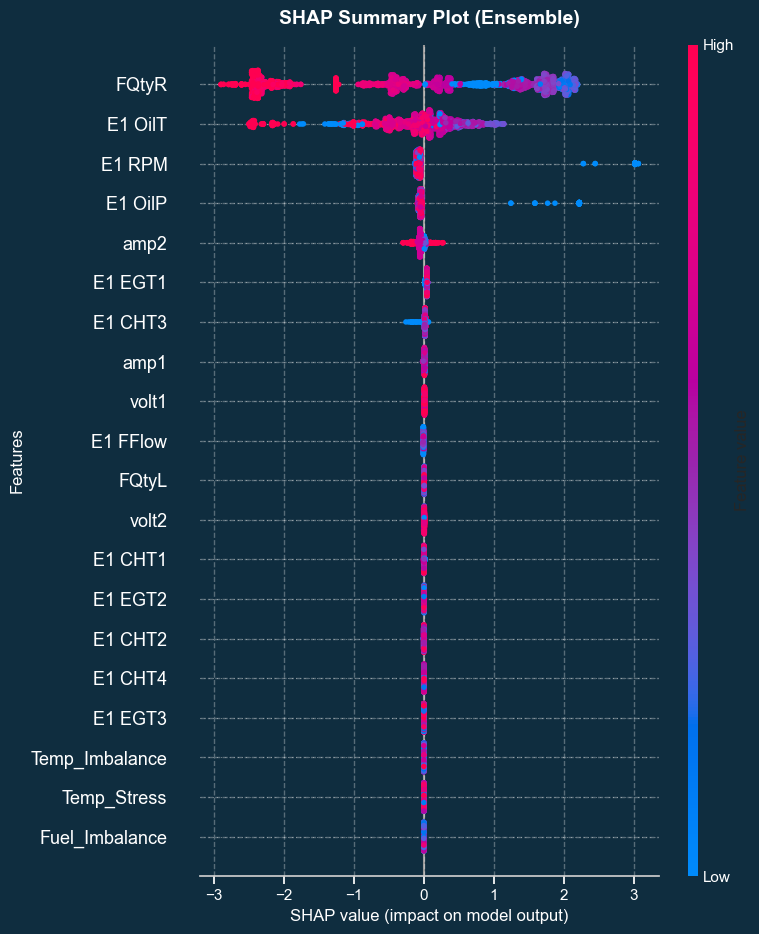

In [101]:
import shap
import matplotlib.pyplot as plt
shap_values_ensemble = (shap_values_rf_selected + shap_values_xgb_array) / 2
shap.summary_plot(shap_values_ensemble, X_resampled_test, show=False)

fig = plt.gcf()
ax = plt.gca()

fig.patch.set_facecolor('#0f2d3f')
ax.set_facecolor('#0f2d3f')

ax.tick_params(colors='white')
plt.setp(ax.get_xticklabels(), color='white')
plt.setp(ax.get_yticklabels(), color='white')

plt.title("SHAP Summary Plot (Ensemble)", fontsize=14, fontweight='bold', color='white', pad=15)
plt.xlabel("SHAP value (impact on model output)", color='white', fontsize=12)
plt.ylabel("Features", color='white', fontsize=12)

plt.grid(color='white', linestyle='--', alpha=0.3)


if len(fig.axes) > 1:
    cbar_ax = fig.axes[-1]
    cbar_ax.set_facecolor('#0f2d3f')
    cbar_ax.tick_params(colors='white')
    for label in cbar_ax.get_yticklabels():
        label.set_color('white')

plt.tight_layout()
plt.savefig("shap_summary_ensemble_dark.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()


In [102]:
'''
shap.summary_plot(shap_values, X_resampled_test, plot_type="bar")  # 條形圖 Summary Plot
plt.savefig("SHAP summary2.png", dpi=300, bbox_inches='tight')
'''

'\nshap.summary_plot(shap_values, X_resampled_test, plot_type="bar")  # 條形圖 Summary Plot\nplt.savefig("SHAP summary2.png", dpi=300, bbox_inches=\'tight\')\n'

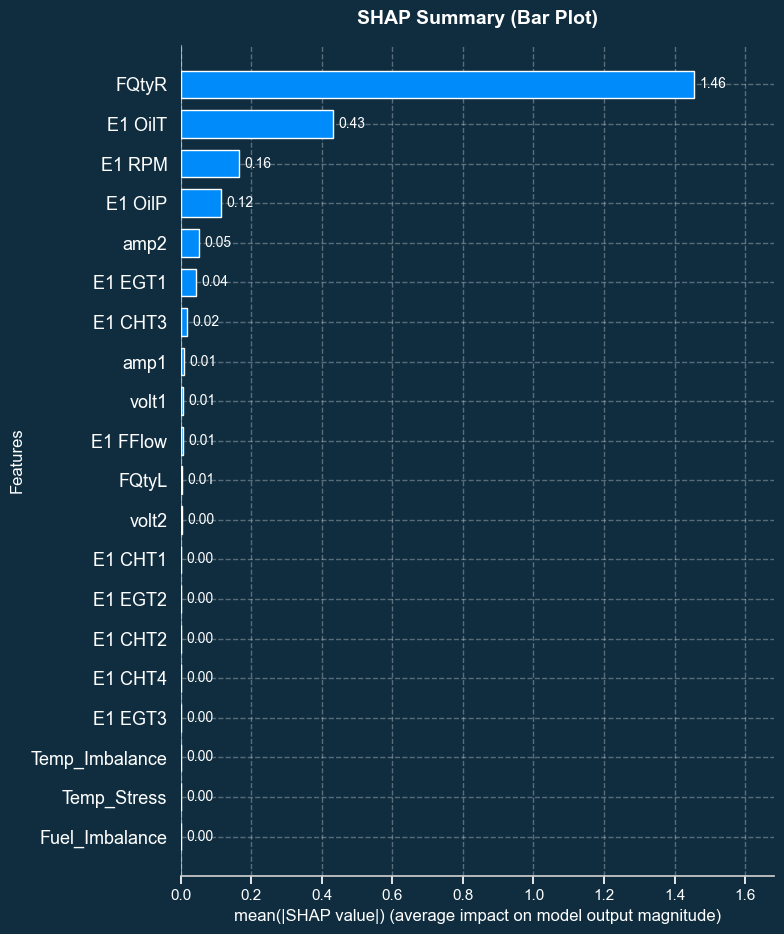

In [103]:
import shap
import matplotlib.pyplot as plt
shap.summary_plot(shap_values_ensemble, X_resampled_test, plot_type="bar", show=False)

fig = plt.gcf()
ax = plt.gca()

fig.patch.set_facecolor('#0f2d3f')
ax.set_facecolor('#0f2d3f')
ax.tick_params(colors='white')
plt.setp(ax.get_yticklabels(), color='white')
plt.setp(ax.get_xticklabels(), color='white')

plt.title("SHAP Summary (Bar Plot)", fontsize=14, fontweight='bold', color='white', pad=15)
plt.xlabel("mean(|SHAP value|) (average impact on model output magnitude)", color='white', fontsize=12)
plt.ylabel("Features", color='white', fontsize=12)


bars = ax.patches
current_xlim = ax.get_xlim()
ax.set_xlim(0, current_xlim[1] * 1.1)

for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height()/2
    ax.text(width + (current_xlim[1]*0.01), y_pos,
            f'{width:.2f}',
            ha='left', va='center',
            fontsize=10, color='white')

plt.grid(axis='x', color='white', linestyle='--', alpha=0.3)
plt.grid(axis='y', color='white', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig("shap_summary_bar_dark.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()


### Others

In [104]:
'''
import pandas as pd
from IPython.display import display

data = {
    'Metrics (train)': ['Logistic Reg.', 'LDA', 'CART', 'Random Forest', 'XGBoost', 'LightGBM', 'Hard Voting', 'Soft Voting'],
    'TPR': [0.3377, 0.3265, 0.7721, 0.7981, 0.822, 0.8135, 0.8159, 0.8195],
    'FPR': [0.1785, 0.1763, 0.169, 0.1348, 0.1345, 0.1387, 0.137, 0.1364],
    'Accuracy': [0.6103, 0.6066, 0.8053, 0.8359, 0.8465, 0.8404, 0.8424, 0.8444],
    'Precision': [0.5946, 0.5894, 0.7797, 0.821, 0.8257, 0.8197, 0.8219, 0.8233],
    'AUR-ROC': [0.6271, 0.6262, 0.8467, 0.8316, 0.9166, 0.8565, 0.8866, 0.8949]
}

df = pd.DataFrame(data)

df.set_index('Metrics (train)', inplace=True)

styled_df = (df.style
    .format(precision=4)
    .set_caption("Model Performance Metrics (Train)")
    .set_table_styles([
        {'selector': 'caption',
         'props': [('text-align', 'center'),
                   ('font-size', '16px'),
                   ('font-weight', 'bold'),
                   ('color', '#333333')]
        },
        {'selector': 'th',
         'props': [('font-weight', 'bold'),
                   ('background-color', '#f2f2f2'),
                   ('text-align', 'center'),
                   ('border', '1px solid #ccc')]
        },
        {'selector': 'td',
         'props': [('border', '1px solid #ccc'),
                   ('text-align', 'center')]
        },
        {'selector': 'tr:nth-child(even) td',
         'props': [('background-color', '#fafafa')]
        }
    ])
)

display(styled_df)
'''

'\nimport pandas as pd\nfrom IPython.display import display\n\ndata = {\n    \'Metrics (train)\': [\'Logistic Reg.\', \'LDA\', \'CART\', \'Random Forest\', \'XGBoost\', \'LightGBM\', \'Hard Voting\', \'Soft Voting\'],\n    \'TPR\': [0.3377, 0.3265, 0.7721, 0.7981, 0.822, 0.8135, 0.8159, 0.8195],\n    \'FPR\': [0.1785, 0.1763, 0.169, 0.1348, 0.1345, 0.1387, 0.137, 0.1364],\n    \'Accuracy\': [0.6103, 0.6066, 0.8053, 0.8359, 0.8465, 0.8404, 0.8424, 0.8444],\n    \'Precision\': [0.5946, 0.5894, 0.7797, 0.821, 0.8257, 0.8197, 0.8219, 0.8233],\n    \'AUR-ROC\': [0.6271, 0.6262, 0.8467, 0.8316, 0.9166, 0.8565, 0.8866, 0.8949]\n}\n\ndf = pd.DataFrame(data)\n\ndf.set_index(\'Metrics (train)\', inplace=True)\n\nstyled_df = (df.style\n    .format(precision=4)\n    .set_caption("Model Performance Metrics (Train)")\n    .set_table_styles([\n        {\'selector\': \'caption\',\n         \'props\': [(\'text-align\', \'center\'),\n                   (\'font-size\', \'16px\'),\n                   (\'f

In [105]:
import pandas as pd
from IPython.display import display

data = {
    'Metrics (train)': ['Logistic Reg.', 'LDA', 'CART', 'Random Forest', 'XGBoost', 'LightGBM', 'Hard Voting', 'Soft Voting'],
    'TPR': [0.3377, 0.3265, 0.7721, 0.7981, 0.822, 0.8135, 0.8159, 0.8195],
    'FPR': [0.1785, 0.1763, 0.169, 0.1348, 0.1345, 0.1387, 0.137, 0.1364],
    'Accuracy': [0.6103, 0.6066, 0.8053, 0.8359, 0.8465, 0.8404, 0.8424, 0.8444],
    'Precision': [0.5946, 0.5894, 0.7797, 0.821, 0.8257, 0.8197, 0.8219, 0.8233],
    'AUR-ROC': [0.6271, 0.6262, 0.8467, 0.8316, 0.9166, 0.8565, 0.8866, 0.8949]
}

df = pd.DataFrame(data)

df.set_index('Metrics (train)', inplace=True)

styled_df = (df.style
    .format("{:.4f}")
    .set_caption("Model Performance Metrics (Train)")
    .set_table_styles([
        {'selector': 'caption',
         'props': [('text-align', 'center'),
                   ('font-size', '16px'),
                   ('font-weight', 'bold'),
                   ('color', 'white'),
                   ('background-color', '#0f2d3f'),
                   ('padding', '10px')]}
        ,
        {'selector': 'th',
         'props': [('font-weight', 'bold'),
                   ('background-color', '#0f2d3f'),
                   ('color', 'white'),
                   ('text-align', 'center'),
                   ('border', '1px solid white')]}
        ,
        {'selector': 'td',
         'props': [('border', '1px solid white'),
                   ('text-align', 'center'),
                   ('color', 'white'),
                   ('background-color', '#1e3d58')]}
        ,
        {'selector': 'tr:nth-child(even) td',
         'props': [('background-color', '#0f2d3f')]}
    ])
)

display(styled_df)



,TPR,FPR,Accuracy,Precision,AUR-ROC
Metrics (train),,,,,
Logistic Reg.,0.3377,0.1785,0.6103,0.5946,0.6271
LDA,0.3265,0.1763,0.6066,0.5894,0.6262
CART,0.7721,0.1690,0.8053,0.7797,0.8467
Random Forest,0.7981,0.1348,0.8359,0.8210,0.8316
XGBoost,0.8220,0.1345,0.8465,0.8257,0.9166
LightGBM,0.8135,0.1387,0.8404,0.8197,0.8565
Hard Voting,0.8159,0.1370,0.8424,0.8219,0.8866
Soft Voting,0.8195,0.1364,0.8444,0.8233,0.8949


In [106]:
import pandas as pd
from IPython.display import display

data = {
    'Metrics (test)': ['Logistic Reg.', 'LDA', 'CART', 'Random Forest', 'XGBoost', 'LightGBM', 'Hard Voting', 'Soft Voting'],
    'TPR': [0.3359, 0.3259, 0.7644, 0.791, 0.8141, 0.81, 0.8118, 0.8145],
    'FPR': [0.1793, 0.1773, 0.174, 0.137, 0.1397, 0.1397, 0.1385, 0.1387],
    'Accuracy': [0.609, 0.6058, 0.7991, 0.8316, 0.8401, 0.8383, 0.8398, 0.8409],
    'Precision': [0.5922, 0.5876, 0.773, 0.8174, 0.8187, 0.818, 0.8196, 0.8199],
    'AUR-ROC': [0.6251, 0.6242, 0.8261, 0.827, 0.8403, 0.8398, 0.8396, 0.8397]
}

df = pd.DataFrame(data)

df.set_index('Metrics (test)', inplace=True)

styled_df = (df.style
    .format("{:.4f}")
    .set_caption("Model Performance Metrics (Test)")
    .set_table_styles([
        {'selector': 'caption',
         'props': [('text-align', 'center'),
                   ('font-size', '16px'),
                   ('font-weight', 'bold'),
                   ('color', 'white'),
                   ('background-color', '#0f2d3f'),
                   ('padding', '10px')]}
        ,
        {'selector': 'th',
         'props': [('font-weight', 'bold'),
                   ('background-color', '#0f2d3f'),
                   ('color', 'white'),
                   ('text-align', 'center'),
                   ('border', '1px solid white')]}
        ,
        {'selector': 'td',
         'props': [('border', '1px solid white'),
                   ('text-align', 'center'),
                   ('color', 'white'),
                   ('background-color', '#1e3d58')]}
        ,
        {'selector': 'tr:nth-child(even) td',
         'props': [('background-color', '#0f2d3f')]}
    ])
)

display(styled_df)


,TPR,FPR,Accuracy,Precision,AUR-ROC
Metrics (test),,,,,
Logistic Reg.,0.3359,0.1793,0.6090,0.5922,0.6251
LDA,0.3259,0.1773,0.6058,0.5876,0.6242
CART,0.7644,0.1740,0.7991,0.7730,0.8261
Random Forest,0.7910,0.1370,0.8316,0.8174,0.8270
XGBoost,0.8141,0.1397,0.8401,0.8187,0.8403
LightGBM,0.8100,0.1397,0.8383,0.8180,0.8398
Hard Voting,0.8118,0.1385,0.8398,0.8196,0.8396
Soft Voting,0.8145,0.1387,0.8409,0.8199,0.8397


In [107]:
import pandas as pd
from IPython.display import display

data = {
    'Confidence Interval': ['Random Forest', 'XGBoost', 'LightGBM', 'Soft Voting'],
    'Lower Bound (5%)': [0.7866, 0.8107, 0.8063, 0.811],
    'Upper Bound (95%)': [0.7954, 0.8185, 0.8145, 0.8186],
    'Mean TPR': [0.7911, 0.8144, 0.8102, 0.8146]
}

df = pd.DataFrame(data)

df.set_index('Confidence Interval', inplace=True)

styled_df = (df.style
    .format("{:.4f}")
    .set_caption("Confidence Interval for TPR")
    .set_table_styles([
        {'selector': 'caption',
         'props': [('text-align', 'center'),
                   ('font-size', '16px'),
                   ('font-weight', 'bold'),
                   ('color', 'white'),
                   ('background-color', '#0f2d3f'),
                   ('padding', '10px')]}
        ,
        {'selector': 'th',
         'props': [('font-weight', 'bold'),
                   ('background-color', '#0f2d3f'),
                   ('color', 'white'),
                   ('text-align', 'center'),
                   ('border', '1px solid white')]}
        ,
        {'selector': 'td',
         'props': [('border', '1px solid white'),
                   ('text-align', 'center'),
                   ('color', 'white'),
                   ('background-color', '#1e3d58')]}
        ,
        {'selector': 'tr:nth-child(even) td',
         'props': [('background-color', '#0f2d3f')]}
    ])
)

display(styled_df)


,Lower Bound (5%),Upper Bound (95%),Mean TPR
Confidence Interval,,,
Random Forest,0.7866,0.7954,0.7911
XGBoost,0.8107,0.8185,0.8144
LightGBM,0.8063,0.8145,0.8102
Soft Voting,0.8110,0.8186,0.8146


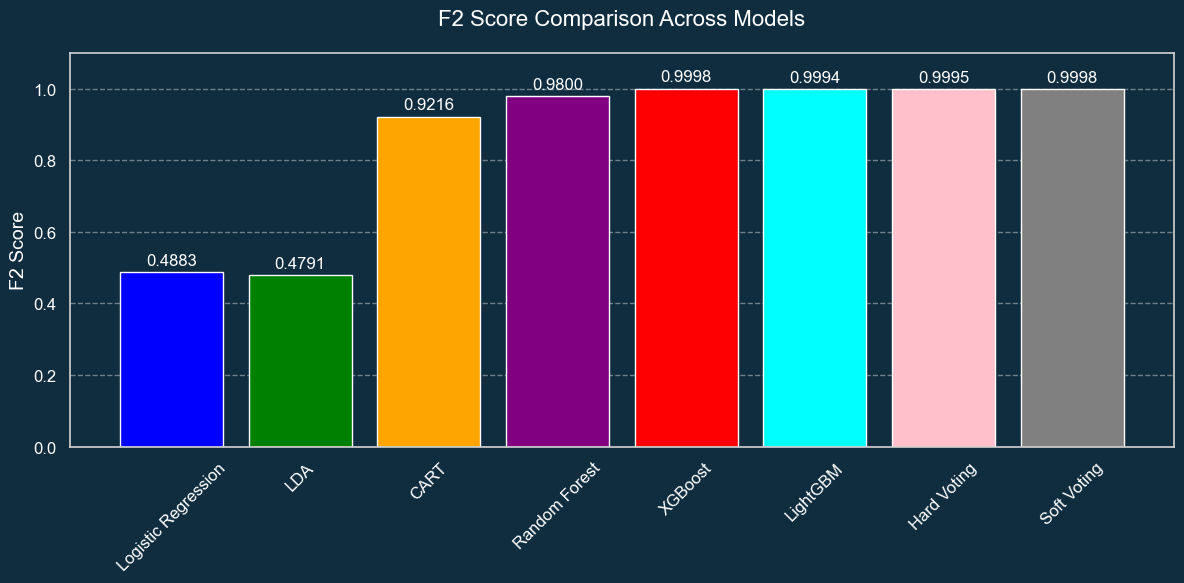

In [108]:
from sklearn.metrics import fbeta_score

# Logistic Regression
f2_logit = fbeta_score(y_test, logit_pred, beta=2)

# LDA
f2_lda = fbeta_score(y_test, lda_pred, beta=2)

# CART
f2_cart = fbeta_score(y_test, cart_pred, beta=2)

# Random Forest
f2_rf = fbeta_score(y_test, rf_pred, beta=2)

# XGBoost
f2_xgb = fbeta_score(y_test, xgb_pred, beta=2)

# LightGBM
f2_lgb = fbeta_score(y_test, lgb_pred, beta=2)

# Hard Voting
f2_hard = fbeta_score(y_test, hard_pred, beta=2)

# Soft Voting
f2_soft = fbeta_score(y_test, soft_pred, beta=2)

# Collect F2 scores
f2_scores = [
    f2_logit, f2_lda, f2_cart, f2_rf,
    f2_xgb, f2_lgb, f2_hard, f2_soft
]

# Plot F2 scores
plt.figure(figsize=(12, 6))
ax = plt.gca()
fig = plt.gcf()

fig.patch.set_facecolor('#0f2d3f')
ax.set_facecolor('#0f2d3f')

bars = plt.bar(models, f2_scores, color=[
    'blue', 'green', 'orange', 'purple', 'red', 'cyan', 'pink', 'gray'
])

plt.title('F2 Score Comparison Across Models', fontsize=16, pad=20, color='white')
plt.ylabel('F2 Score', fontsize=14, color='white')
plt.xticks(rotation=45, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.ylim(0, 1.1)

plt.grid(axis='y', linestyle='--', alpha=0.4, color='white')
ax.xaxis.grid(False)

for bar, f2 in zip(bars, f2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.02,
             f'{f2:.4f}',
             ha='center', fontsize=12, color='white')

plt.tight_layout()
plt.savefig("F2_score_comparison.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()


### Data analysis

In [109]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access the decision tree estimator
best_tree = dtc_cv_auc.best_estimator_



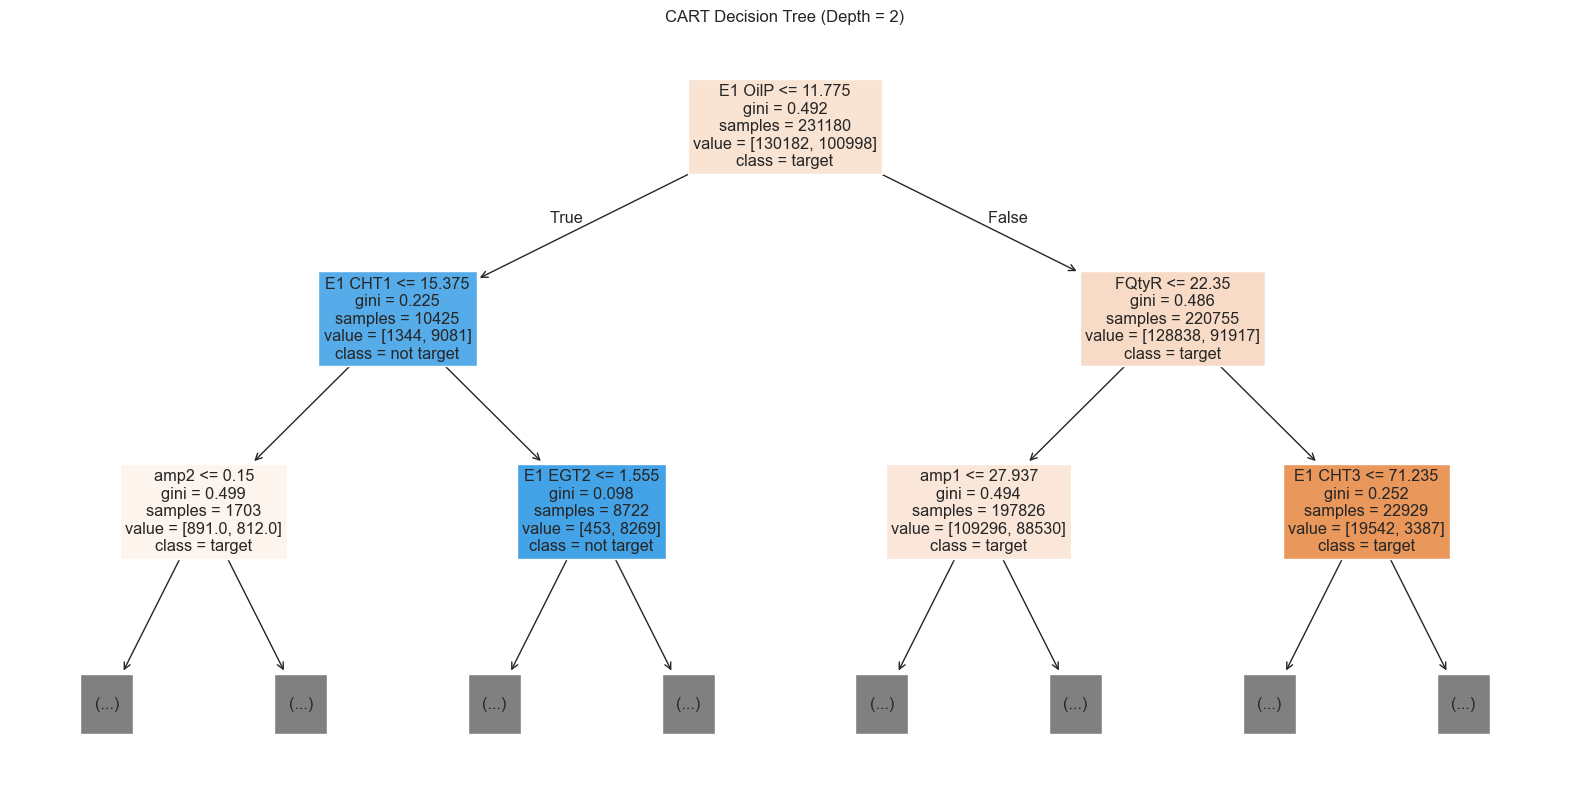

In [110]:
# Visualize the tree up to a limited depth (e.g., 2 levels)
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=['target', 'not target'], max_depth=2)
plt.title("CART Decision Tree (Depth = 2)")
plt.show()


In [111]:
# Access the best decision tree from GridSearchCV
best_tree = dtc_cv_auc.best_estimator_

# Access the tree structure
tree = best_tree.tree_

# Print tree attributes
print("Number of features:", tree.n_features)
print("Number of nodes:", tree.node_count)
print("Number of classes:", tree.n_classes)


Number of features: 16
Number of nodes: 911
Number of classes: [2]


Corr(OAT, target) = -0.11
Corr(E1 OilT, target) = -0.04
Corr(amp1, target) = 0.12
Corr(volt1, target) = 0.03


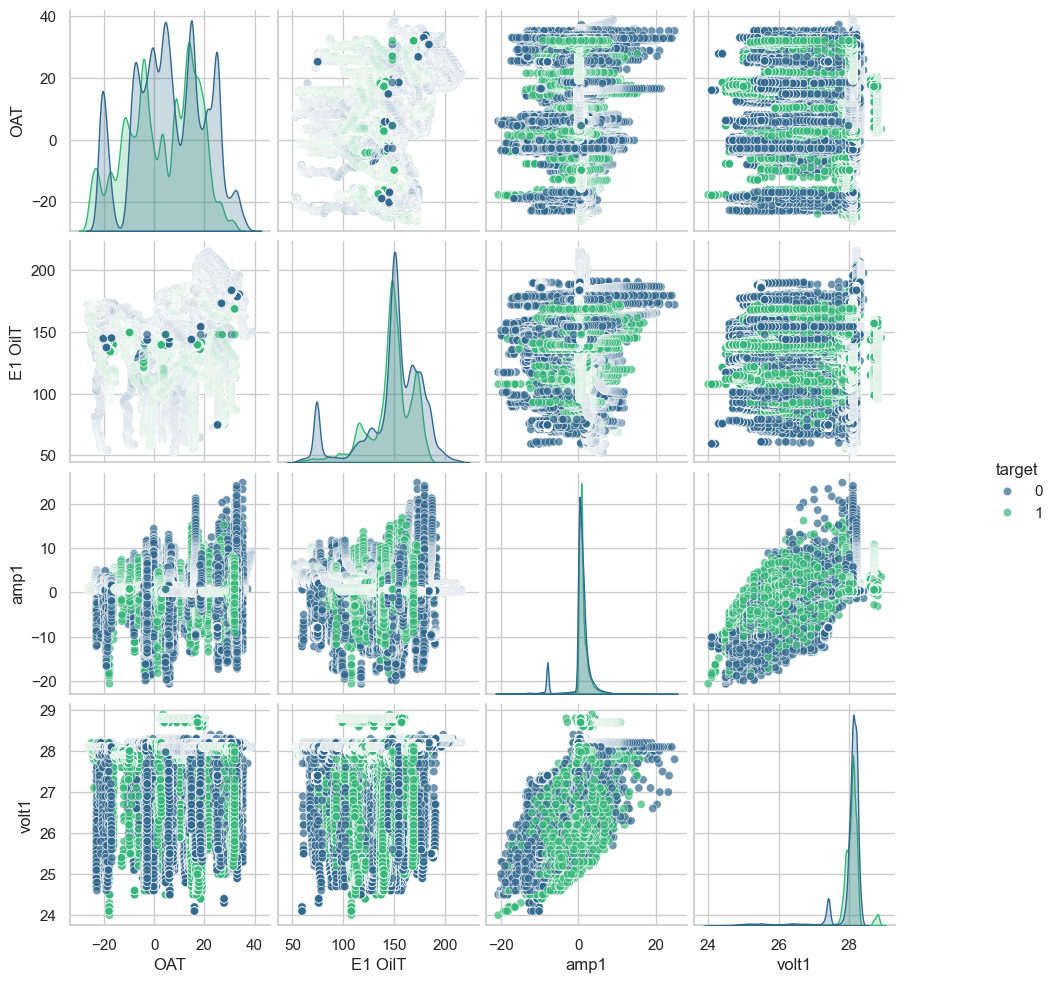

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel('dataset.xlsx')

features = ['OAT', 'E1 OilT', 'amp1', 'volt1']
df_selected = df[features + ['target']]  # Add 'target' column to the selection

# Create the scatter plot matrix (pairplot) with features against the target
sns.pairplot(df_selected, kind="scatter", hue="target", palette="viridis", plot_kws={'alpha': 0.7})

# Optionally, if you want to calculate and display the correlation coefficients:
corr_matrix = df_selected.corr()

# Adding a color bar for correlation matrix values
plt.subplots_adjust(right=0.85)

# Display the correlation coefficients in the plot as text
for i, feature in enumerate(features):
    correlation = corr_matrix.loc[feature, 'target']
    print(f"Corr({feature}, target) = {correlation:.2f}")

plt.show()